#### <u>Business Understanding</u>:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from 
one operator to another. In this highly competitive market, the telecommunications industry experiences an 
average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer 
than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many operators, retaining high profitable customers is the number one business goal.
  
<b>Strategy:</b> Based on the existing customer datasets, to predict which customers are at high risk of churn and 
recommend strategies to manage customer churn based on the observations.

<b>Business Objective:</b> The objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

<b><u>Customer Behaviour During Churn</u></b>

In the given dataset of four-month window;

   <b>Good Phase  :</b> First Two Months<br>
   <b>Action Phase:</b> Third Month<br>
   <b>Churn Phase :</b> Fourth Month

<b><u>Preprocessing Rules</u></b>

   1. Consider only <b>High-value customers:</b> approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
   2. Consider Only <b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
   
<b><u>Data Preparation:</u></b>

The following data preparation steps are crucial for this problem:
 
   1. Derive new features 
   2. Filter high-value customers 
       - Based 70th percentile of the average recharge amount in the first two months.
   3. Tag churners and remove attributes of the churn phase
       - Attributes (total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9).

<b>Note:</b> After tagging churners, Remove all the attributes corresponding to the churn phase (Name starts with'_9').


<b><u>Suggested Steps:</u></b>

   1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.).
   2. Conduct appropriate exploratory analysis to extract useful insights.
   3. Derive new features.
   4. Reduce the number of variables using PCA.
   5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance).
   6. Evaluate the models using appropriate evaluation metrics. 
   7. choose a model based on some evaluation metric.
   8. Identifying important predictor attributes which help the business to understand indicators of churn.
   9. After identifying important predictors, display them visually.<br>
   10. Recommend strategies to manage customer churn based on your observations.

#### <u>Data Sources</u>:

1. DataDictionaryTelecomChurnCaseStudy.xlsx --> Provides meaning of the column attributes for the given customer dataset.
2. telecom_churn_data.csv              --> Customer data for four months between Jun-2014 to Sep-2014.

# Reading and Understanding the Data

In [56]:
#Importing few important libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)

In [57]:
# Reading the dataset in variable called as data
data = pd.read_csv("telecom_churn_data.csv")
print(data.shape)
data.sample(5)

(99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
57264     7002381229        109             0.0             0.0   
27981     7001667136        109             0.0             0.0   
53151     7000537363        109             0.0             0.0   
80224     7002354615        109             0.0             0.0   
93734     7002116740        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
57264             0.0            6/30/2014            7/31/2014   
27981             0.0            6/30/2014            7/31/2014   
53151             0.0            6/30/2014            7/31/2014   
80224             0.0            6/30/2014            7/31/2014   
93734             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
57264            8/31/2014            9/30/2014  293.493  301.437  212.658   
27981            8/31/2014            9/30/2014  143.629  400.026  147.002   
53151            8/31/2014            9/30/2014   77.391   72.660  165.431   
80224            8/31/2014            9/30/2014  255.071  212.889  325.186   
93734            8/31/2014            9/30/2014  131.390  246.118   75.028   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
57264  264.538       120.01        68.58       109.26        40.73   
27981  123.829        69.76        45.24        96.08        59.48   
53151  175.654        12.96        11.13        36.69        40.16   
80224  290.038        46.41        16.14        13.51        13.68   
93734  627.290        85.76       204.44       148.59       119.23   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
57264         60.09         78.14         82.84         67.54          44.08   
27981        238.71        191.29        172.38        299.44           0.00   
53151         39.18         56.41         85.01         91.36           0.00   
80224        147.11         91.16        115.96         89.53           0.00   
93734         22.14         92.81         74.71        162.26          18.93   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
57264           0.00           0.00           0.00          87.79   
27981           0.00           0.00           0.00           0.00   
53151           0.00           0.00           0.00           0.00   
80224           0.00           0.00           0.00           0.00   
93734           3.34          13.84         175.86           0.00   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
57264           0.00           0.00           0.00             56.59   
27981           0.00           0.00           0.00             69.76   
53151           0.00           0.00           0.00             12.96   
80224           0.00           0.00           0.00             46.41   
93734           1.93          24.73         186.46             70.53   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
57264             68.58            109.26             40.73             18.31   
27981             45.24             96.08             59.48            222.99   
53151             11.13             36.69             40.16             38.69   
80224             16.14             13.51             13.68            116.91   
93734            194.29            131.73             47.66              6.56   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
57264             38.98             39.33             38.18              0.36   
27981            172.59            166.36            270.28              5.48   
53151             51.99             77.33             90.13              0.28   
80224             84.26            103.31             89.53              1.51   
93734             60.79             44.33             42.36              1.09   

       l

In [58]:
# Checking the data insight
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [59]:
# Checking for dupicates in mobile number column
sum(data.duplicated(subset= "mobile_number"))

0

**Initial Observations**
- There are 226 columns divided into 4 months 6-9
- To decide the churn rate columns related to revenue, recharge, usage are important
- As per given information we need to identify the prime customers which needs analysis of behaviour of customer

In [60]:
# Checking Null Values
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [61]:
# Extracting columns which represent some total
monthwise_total = data.columns[data.columns.str.contains('total')]
monthwise_total

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

In [62]:
# Extracting columns which represent some recharge
monthwise_recharges = data.columns[data.columns.str.contains('rech_amt')]
monthwise_recharges

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

## Churn or Not Churn

**As per the given context:**
- We need to create new column for labeling churn or not churn as per the 9th month usage information
- After that need to drop the 9th months data

In [63]:
# Finding all columns related to september month
sep_col = [x for x in list(data) if "_9" in x or "sep" in x or "Sep" in x or "September" in x or "september" in x]
print(sep_col)


#from these columns to detemine churn or not we only need information from incoming, outgoing and data usage.
data['churn'] = np.where(data[['vol_2g_mb_9','vol_3g_mb_9', 'total_ic_mou_9','total_og_mou_9']].sum(axis = 1) == 0,1,0)
print(data.shape)
data.head(3)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']
(99999, 22

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN            0.0   
1        304.76         53.76            0.0            0.0            0.0   
2        208.36        118.91            0.0            0.0            0.0   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN            0.0            NaN   
1           0.00            0.0            0.0            0.0           0.00   
2          38.49            0.0            0.0            0.0          70.94   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1              4.11              0.00              0.00              0.00   
2             26.49             22.58              8.76             41.81   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.46              0.13              0.00              0.00   
2             67.41             75.53              9.28              1.48   

   std_og_t2f_mou_

In [64]:
#Checking data balance for Churning 
print(data.churn.value_counts()/len(data))


0    0.898089
1    0.101911
Name: churn, dtype: float64


In [65]:
# Dropping information related to column 9 as it will not be available for prediction
data = data.drop(columns=sep_col, axis = 1)
print(data.shape)

(99999, 172)


**As per the problem statement the high-value customers shoud be defined as:**

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

- To identify the high value customers we need to check the total usage 
- We have 2 kinds of recharge 1) cellular 2) Data
- We will find the total recharge amount for month 6 & 7 and create a new dataframe for prime(high value) customers only

In [66]:
# Extracting columns which represent some recharge
monthwise_recharges = data.columns[data.columns.str.contains('rech_amt')]
monthwise_recharges

monthwise_data_recharges_cols = data.columns[data.columns.str.contains('_data_')]
monthwise_data_recharges_cols
# from above column list we have total recharged data but not the cost; we can get it by multiplying the avg data rech amnt

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')

**Derived few columns as per requirement**

In [67]:
# derived Columns which are required for further calculation
columns_to_consider_cell = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
columns_to_consider_data = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                      'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

In [68]:
# Calculate the total data recharge amount 
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6'] 
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data.shape

(99999, 175)

In [69]:
# now we don't need other 2 columns as we have calculated the total data recharge amount hence dropping them 
data = data.drop(columns=columns_to_consider_data, axis = 1)
data.shape

(99999, 169)

In [70]:
# To calculate total recharge amount we need following columns
total_rech_6_and_7_cols = ['total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_rech_amt_6', 'total_rech_amt_7']

# Check if null values are there
print(data[total_rech_6_and_7_cols].isnull().sum())

# We will replace null with 0 for now
data[total_rech_6_and_7_cols] = data[total_rech_6_and_7_cols].fillna(0)

# Check if null values are there
print(data[total_rech_6_and_7_cols].isnull().sum())

total_data_rech_amt_6    74846
total_data_rech_amt_7    74428
total_rech_amt_6             0
total_rech_amt_7             0
dtype: int64
total_data_rech_amt_6    0
total_data_rech_amt_7    0
total_rech_amt_6         0
total_rech_amt_7         0
dtype: int64


In [71]:
# Now we will derive new column as total_avg_rech_amt_6_and_7 to store total avg recharge amount for month 6 and 7
total_avg_rech_amt_6_and_7 = (data['total_data_rech_amt_6'] + data['total_data_rech_amt_7'] \
                                 + data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
print("Amount of recharge for 6 and 7 mnth is: ", sum(total_avg_rech_amt_6_and_7) , "\n\n")
data.head(5)

Amount of recharge for 6 and 7 mnth is:  48532321.43 




mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  197.385   
1            6/30/2014            7/31/2014            8/31/2014   34.047   
2            6/30/2014            7/31/2014            8/31/2014  167.690   
3            6/30/2014            7/31/2014            8/31/2014  221.338   
4            6/30/2014            7/31/2014            8/31/2014  261.636   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.816  213.803          NaN          NaN         0.00           NaN   
1  355.074  268.321        24.11        78.68         7.68         15.74   
2  189.058  210.226        11.54        55.24        37.26        143.33   
3  251.102  508.054        99.91        54.39       310.98        123.31   
4  309.876  238.174        50.31       149.44        83.89         76.96   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1         99.84        304.76            0.0           0.00           0.00   
2        220.59        208.36            0.0           0.00           0.00   
3        109.01         71.68            0.0          54.86          44.38   
4         91.88        124.26            0.0           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1            0.0           0.00           0.00             23.88   
2            0.0           0.00           0.00              7.19   
3            0.0          28.09          39.04             73.68   
4            0.0           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             11.51             75.94   
2             28.74             13.58             29.34             16.86   
3             34.81             10.61            107.43             83.21   
4            149.44             83.89             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            291.86              0.00              0.00              0.00   
2             38.46             24.11             21.79             15.61   
3             22.46              1.91              0.65              4.91   
4            124.26              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0              2.91              0.00         35.39   
2               0.0            135.54             45.76         60.66   
3               0.0              0.00              0.00        183.03   
4               0.0              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        150.51        299.54              0.23              4.11   
2         67.41         67.66              4.34             26.49   
3        118.68         37.99             26.23             14.89   
4        241.33     

In [72]:
# We need highvalue customers which have 70% or more avg recharge amount (6 & 7 month)
prime_cust_threshold = np.percentile(total_avg_rech_amt_6_and_7, 70.0)
print("The prime customer threshold recharge amount is: ", prime_cust_threshold)

The prime customer threshold recharge amount is:  478.0


In [73]:
# Now we will create new dataframe which will have only prime customer with percentile recharge >=70
prime = data[total_avg_rech_amt_6_and_7 >= prime_cust_threshold]
prime.shape

(30001, 169)

In [74]:
# Checking the data balance
print(prime.churn.value_counts()/len(prime))
prime_backup = prime.copy()

prime.head(3)

0    0.918636
1    0.081364
Name: churn, dtype: float64


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
7            6/30/2014            7/31/2014            8/31/2014  1069.180   
8            6/30/2014            7/31/2014            8/31/2014   378.721   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803          NaN          NaN         0.00           NaN   
7  1349.850  3171.480        57.84        54.68        52.29        453.43   
8   492.223   137.362       413.69       351.03        35.08         94.66   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
7        567.16        325.91          16.23          33.49          31.64   
8         80.63        136.48           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
7          23.74          12.59          38.06             51.39   
8           0.00           0.00           0.00            297.13   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
7             31.38             40.28            308.63            447.38   
8            217.59             12.49             80.96             70.58   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
7            162.28             62.13             55.14             53.23   
8             50.54              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
7               0.0               0.0              0.00        422.16   
8               0.0               0.0              7.15        378.09   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
7        533.91        255.79              4.30             23.29   
8        288.18         63.04            116.56            133.43   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00               NaN               NaN              0.00   
7             12.01             49.89             31.76             49.14   
8             22.58             13.69             10.04             75.69   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0               NaN               NaN              0.00               NaN   
7              6.66             20.08             16.68               0.0   
8              0.00              0.00              0.00               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               NaN               0.0           NaN           NaN   
7               0.0               0.0         60.86         75.14   
8               0.0               0.0        130.26        143.48   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           NaN           NaN          0.00           NaN   
7         77.84           0.0          0.18         10.01           4.5   
8         98.28           0.0          0.00          0.00           0.0   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0           NaN   

# EDA and Data Cleaning

In [75]:
# Getting the columns with only one unique value
cols_to_remove = []
for i in list(prime):
    if len(prime[i].value_counts()) == 1:
        cols_to_remove.append(i)
print(cols_to_remove)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [76]:
# Droping columns with no variance 
prime = prime.drop(cols_to_remove, axis= 1)
prime.shape

(30001, 156)

In [77]:
# Percentage of null values in different columns
col_list = list(prime)
null = []
for i in prime.isnull().sum()*100/prime.shape[0]:
    null.append(i)
data = {"columns": col_list, "% null": null}
df_null = pd.DataFrame(data)
df_null[df_null["% null"] != 0]

columns     % null
4                 onnet_mou_6   1.816606
5                 onnet_mou_7   1.789940
6                 onnet_mou_8   3.913203
7                offnet_mou_6   1.816606
8                offnet_mou_7   1.789940
9                offnet_mou_8   3.913203
10              roam_ic_mou_6   1.816606
11              roam_ic_mou_7   1.789940
12              roam_ic_mou_8   3.913203
13              roam_og_mou_6   1.816606
14              roam_og_mou_7   1.789940
15              roam_og_mou_8   3.913203
16           loc_og_t2t_mou_6   1.816606
17           loc_og_t2t_mou_7   1.789940
18           loc_og_t2t_mou_8   3.913203
19           loc_og_t2m_mou_6   1.816606
20           loc_og_t2m_mou_7   1.789940
21           loc_og_t2m_mou_8   3.913203
22           loc_og_t2f_mou_6   1.816606
23           loc_og_t2f_mou_7   1.789940
24           loc_og_t2f_mou_8   3.913203
25           loc_og_t2c_mou_6   1.816606
26           loc_og_t2c_mou_7   1.789940
27           loc_og_t2c_mou_8   3.913203
28               loc_og_mou_6   1.816606
29               loc_og_mou_7   1.789940
30               loc_og_mou_8   3.913203
31           std_og_t2t_mou_6   1.816606
32           std_og_t2t_mou_7   1.789940
33           std_og_t2t_mou_8   3.913203
34           std_og_t2m_mou_6   1.816606
35           std_og_t2m_mou_7   1.789940
36           std_og_t2m_mou_8   3.913203
37           std_og_t2f_mou_6   1.816606
38           std_og_t2f_mou_7   1.789940
39           std_og_t2f_mou_8   3.913203
40               std_og_mou_6   1.816606
41               std_og_mou_7   1.789940
42               std_og_mou_8   3.913203
43               isd_og_mou_6   1.816606
44               isd_og_mou_7   1.789940
45               isd_og_mou_8   3.913203
46               spl_og_mou_6   1.816606
47               spl_og_mou_7   1.789940
48               spl_og_mou_8   3.913203
49                og_others_6   1.816606
50                og_others_7   1.789940
51                og_others_8   3.913203
55           loc_ic_t2t_mou_6   1.816606
56           loc_ic_t2t_mou_7   1.789940
57           loc_ic_t2t_mou_8   3.913203
58           loc_ic_t2m_mou_6   1.816606
59           loc_ic_t2m_mou_7   1.789940
60           loc_ic_t2m_mou_8   3.913203
61           loc_ic_t2f_mou_6   1.816606
62           loc_ic_t2f_mou_7   1.789940
63           loc_ic_t2f_mou_8   3.913203
64               loc_ic_mou_6   1.816606
65               loc_ic_mou_7   1.789940
66               loc_ic_mou_8   3.913203
67           std_ic_t2t_mou_6   1.816606
68           std_ic_t2t_mou_7   1.789940
69           std_ic_t2t_mou_8   3.913203
70           std_ic_t2m_mou_6   1.816606
71           std_ic_t2m_mou_7   1.789940
72           std_ic_t2m_mou_8   3.913203
73           std_ic_t2f_mou_6   1.816606
74           std_ic_t2f_mou_7   1.789940
75           std_ic_t2f_mou_8   3.913203
76               std_ic_mou_6   1.816606
77               std_ic_mou_7   1.789940
78               std_ic_mou_8   3.913203
82               spl_ic_mou_6   1.816606
83               spl_ic_mou_7   1.789940
84               spl_ic_mou_8   3.913203
85               isd_ic_mou_6   1.816606
86               isd_ic_mou_7   1.789940
87               isd_ic_mou_8   3.913203
88                ic_others_6   1.816606
89                ic_others_7   1.789940
90                ic_others_8   3.913203
100       date_of_last_rech_6   0.243325
101       date_of_last_rech_7   0.326656
102       date_of_last_rech_8   1.943269
106  date_of_last_rech_data_6  44.148528
107  date_of_last_rech_data_7  43.145228
108  date_of_last_rech_data_8  46.825106
109           max_rech_data_6  44.148528
110           max_rech_data_7  43.145228
111           max_rech_data_8  46.825106
112           count_rech_2g_6  44.148528
113           count_rech_2g_7  43.145228
114           count_rech_2g_8  46.825106
115           count_rech_3g_6  44.148528
116           count_rech_3g_7  43.145228
117           count_rech_3g_8  46.825106
124                 arpu_3g_6  44.148528
125 

In [78]:
# Let's check the columns with very large number (>= 40%) of null values
col_list = list(prime)
null = []
for i in prime.isnull().sum()*100/prime.shape[0]:
    null.append(i)
data = {"columns": col_list, "% null": null}
df_null = pd.DataFrame(data)
df_null[df_null["% null"] >= 40].shape

(25, 2)

So there are 25 columns with very high null values

In [79]:
# Checking above 25 columns 
correlation = []

lst = list(df_null[df_null["% null"] >= 40]["columns"])

NonNumCols = []
NumCols = []

for col in list(prime[lst]):
    if prime[lst][col].dtypes == "object":
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
        
for i in NumCols:
    corr = round(list(prime[["churn", i]].corr()[i])[0], 3)
    correlation.append(corr)

print(correlation)

[0.002, -0.008, -0.027, 0.018, -0.003, -0.04, 0.034, 0.02, -0.013, 0.026, 0.007, -0.017, 0.031, 0.012, -0.014, 0.016, 0.003, -0.002, -0.011, -0.013, -0.079, -0.034]


**Observations**: Almost there is no correlation between these 25 columns and churn

In [80]:
# We can see that all the numerical columns with very high (>= 40%) null values are not of much importance for our model building.So, we can drop these columns
prime = prime.drop(NumCols, axis = 1)
prime.shape

(30001, 134)

In [81]:
# Imputing Categorical missing values with the mode
for i in NonNumCols:
    prime[i].fillna(prime[i].mode()[0], inplace=True)

In [82]:
# List of columns related to 'date'
date_cols = [x for x in list(prime) if "date" in x]
print(date_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [83]:
# Extracting day from the date
for i in date_cols:
    prime[i] = pd.to_datetime(prime[i]).dt.day

In [84]:
prime.head(3)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803          NaN          NaN   
7     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8     7001524846   378.721   492.223   137.362       413.69       351.03   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00           NaN           NaN          0.00            NaN   
7        52.29        453.43        567.16        325.91          16.23   
8        35.08         94.66         80.63        136.48           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            NaN           0.00            NaN            NaN           0.00   
7          33.49          31.64          23.74          12.59          38.06   
8           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
7             51.39             31.38             40.28            308.63   
8            297.13            217.59             12.49             80.96   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
7            447.38            162.28             62.13             55.14   
8             70.58             50.54              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               NaN               NaN              0.00   
7             53.23               0.0               0.0              0.00   
8              0.00               0.0               0.0              7.15   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           NaN           NaN          0.00               NaN   
7        422.16        533.91        255.79              4.30   
8        378.09        288.18         63.04            116.56   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
7             23.29             12.01             49.89             31.76   
8            133.43             22.58             13.69             10.04   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
7             49.14              6.66             20.08             16.68   
8             75.69              0.00              0.00              0.00   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0           NaN           NaN          0.00           NaN           NaN   
7         60.86         75.14         77.84           0.0          0.18   
8        130.26        143.48         98.28           0.0          0.00   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0          0.00           NaN           NaN          0.00          NaN   
7         10.01           4.5           0.0          6.50          0.0   
8          0.00           0.0           0.0         10.23          0.0   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          NaN          0.0            0.00            0.00            0.00   
7          0.0          0.0          487.53          609.24          350.16   
8          0.0          0.0          508.36          431.66          171.56   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               NaN               NaN              0.16               NaN   
7             58.14             32.26             27.31            217.56   
8             23.84              9.84              0.31             57.58   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_

In [85]:
# We still have few null vlaues which we will drop (dropping the rows with null values present)
for i in prime.columns:
    if prime[i].isnull().sum()>0:
        prime = prime[~np.isnan(prime[i])]

prime.shape

(28163, 134)

In [86]:
# Checking for null values again
col_list = list(prime)
null = []
for i in prime.isnull().sum()*100/prime.shape[0]:
    null.append(i)
data = {"columns": col_list, "% null": null}
df_null = pd.DataFrame(data)
df_null[df_null["% null"] != 0]

Empty DataFrame
Columns: [columns, % null]
Index: []

**Observation:**
The data now contain no null values and we can proceed ahead.

## Helper Functions

In [87]:
def display_boxplot(variable, data):
    fig_dims = (18,2)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.boxplot(x= variable, data=data, ax=ax)

def display_countplot(variable, data):
    fig_dims = (10, 7)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.countplot(x=data.churn, data=data, hue=variable)
    
def display_barplot(variable, data):
    g = sns.countplot(x=data[variable], data=data)
    total = len(data)
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.0,
               height-15,
               '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=8)

In [88]:
#Plotting separate graphs for all nuerical variables to check distribution
def plot_box_dist(i,j, total, data):

    a=total
    b=2
    c=1
    num_cols = data.columns[i:j]

    fig = plt.figure(figsize=(40,100))
    fig.set_size_inches(30,250)

    for i in num_cols:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
        plt.xlabel(i,fontsize=25)
        plt.ylabel(i,fontsize=25)
        plt.xticks(fontsize=25,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=25)
        sns.boxplot(data[i], color='r')
        c=c+1
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
        plt.xlabel(i,fontsize=25)
        plt.ylabel(i,fontsize=25)
        plt.xticks(fontsize=25,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=25)
        sns.distplot(data[i],color = 'r') #check the estimator 'mean' here by default
        c = c+1
    fig.tight_layout()
    plt.show();

In [89]:
# Function for outlier detection and removal
'''
Even though the upper and lower bond formulae are as given below

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

we will still remove otliers avobe 99% and below 1% data
'''

def remove_outlier(df_in, col_name):
    fence_low = df_in[col_name].quantile(0.01)
    fence_high = df_in[col_name].quantile(0.99)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [90]:
# Function to draw the Plots
def draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows):
    plt.figure(figsize=(20,8))
    
    if y_data == 'vbc_3g':
        
        plt.subplot(231)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y='jun_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(232)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y='jul_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(233)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y='aug_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(234)
        plot = sns.barplot(data=dataframe_name, x=x_data, y='jun_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(235)
        plot = sns.barplot(data=dataframe_name, x=x_data, y='jul_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(236)
        plot = sns.barplot(data=dataframe_name, x=x_data, y='aug_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)
        
    elif y_data == 'aon':
            
        plt.figure(figsize=(20,6))
        plt.subplot(121)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data)
        plot.set(xlabel=x_label, ylabel=y_label)
        plt.subplot(122)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data)
        plot.set(xlabel=x_label, ylabel=y_label)
    
    else:
    
        plt.subplot(231)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data + '_6')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(232)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data + '_7')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(233)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data + '_8')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(234)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data + '_6')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(235)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data + '_7')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(236)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data + '_8')
        plot.set(xlabel=x_label, ylabel=y_label)
        
    plt.suptitle(plot_title)
    
    plt.show()

### Low Correlation Features

In [91]:
# Finding correlation between all the variables wrt Churn
correlation_df = pd.DataFrame(prime.corr()['churn']).reset_index()
correlation_df.set_index(['index'], inplace = True)

#Selection Features with the more positive or negative correlations with SalePrice
correlation_df = correlation_df.loc[(correlation_df.churn > 0.02) | (correlation_df.churn < -0.02)]
features = list(correlation_df.index)
print(features)

print("Total correlated features: ",len(features))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std

In [92]:
filtered_prime = prime[features]
print(filtered_prime.shape)
filtered_prime.head()

(28163, 97)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7              53.23        422.16        533.91        255.79   
8               0.00        378.09        288.18         63.04   
21              1.58         97.04         94.09        129.74   
23              0.00        131.91        133.68        182.14   
33              0.00          0.00          0.00          0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_6  \
7              31.76             49.14             16.68         60.86   
8              10.04             75.69              0.00        130.26   
21            808.74            876.99              0.00        763.29   
23              6.35             39.61              0.00          2.36   
33              0.00              0.00              0.00          0.00   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_8  total_og_mou_6  \
7          75.14         77.84           4.5          6.50          487.53   
8         143.48         98.28           0.0         10.23          508.36   
21        934.69        938.79           0.0          0.00          860.34   
23          6.35         39.61           0.1         17.71          134.38   
33          0.00          0.00           0.0      

<AxesSubplot:>

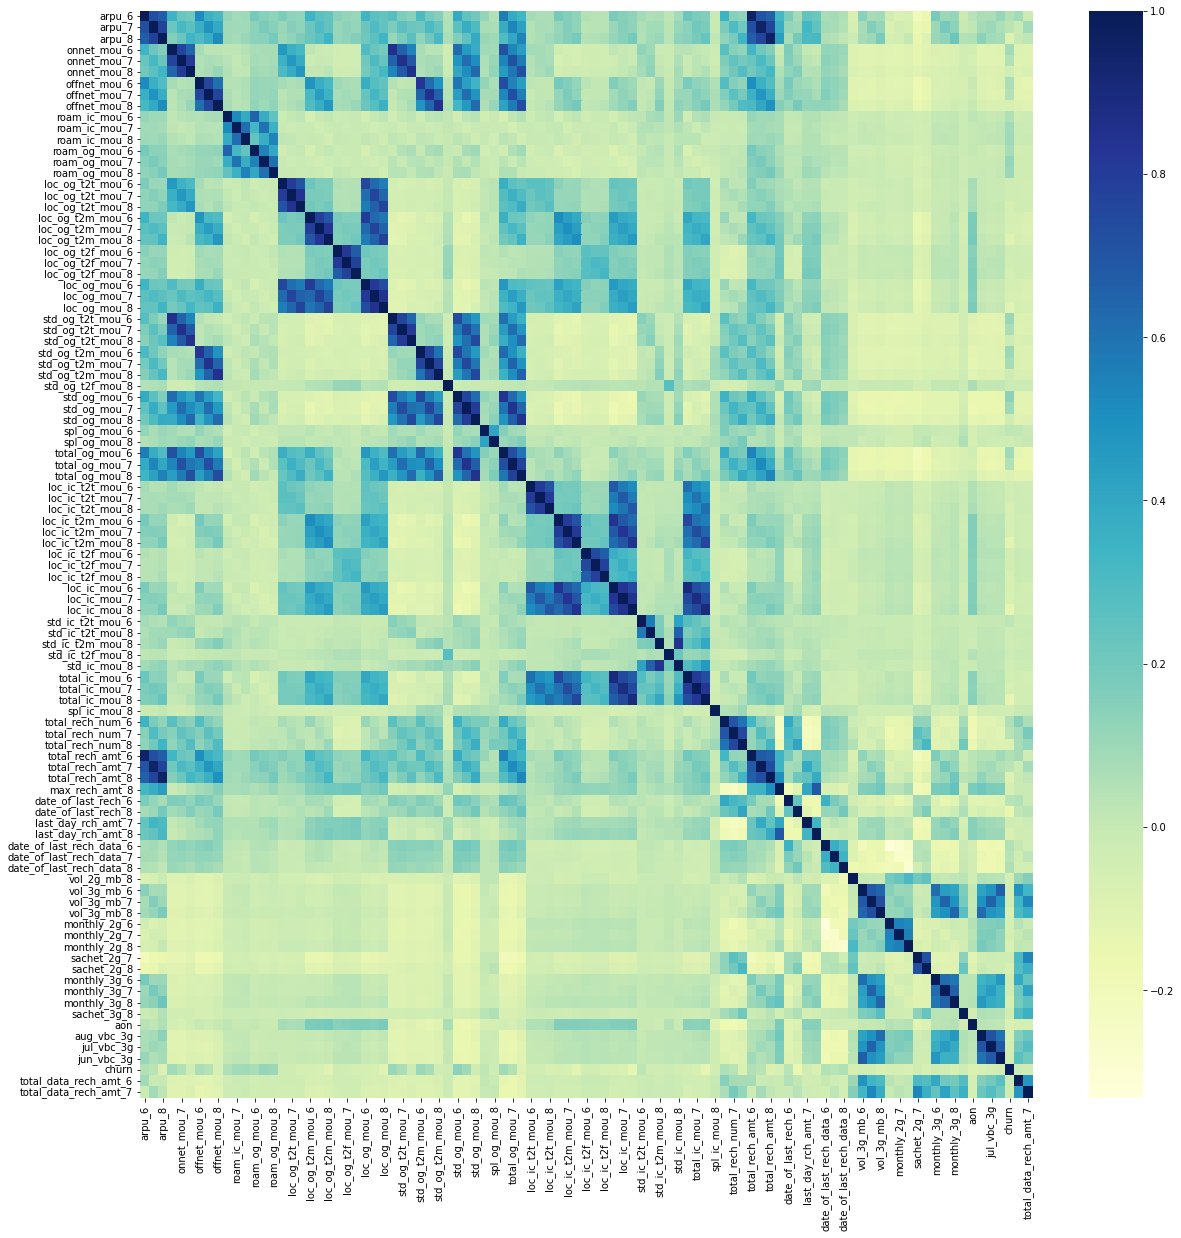

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(filtered_prime.corr(), cmap="YlGnBu")

In [94]:
# plotting few plots to check features with outliers

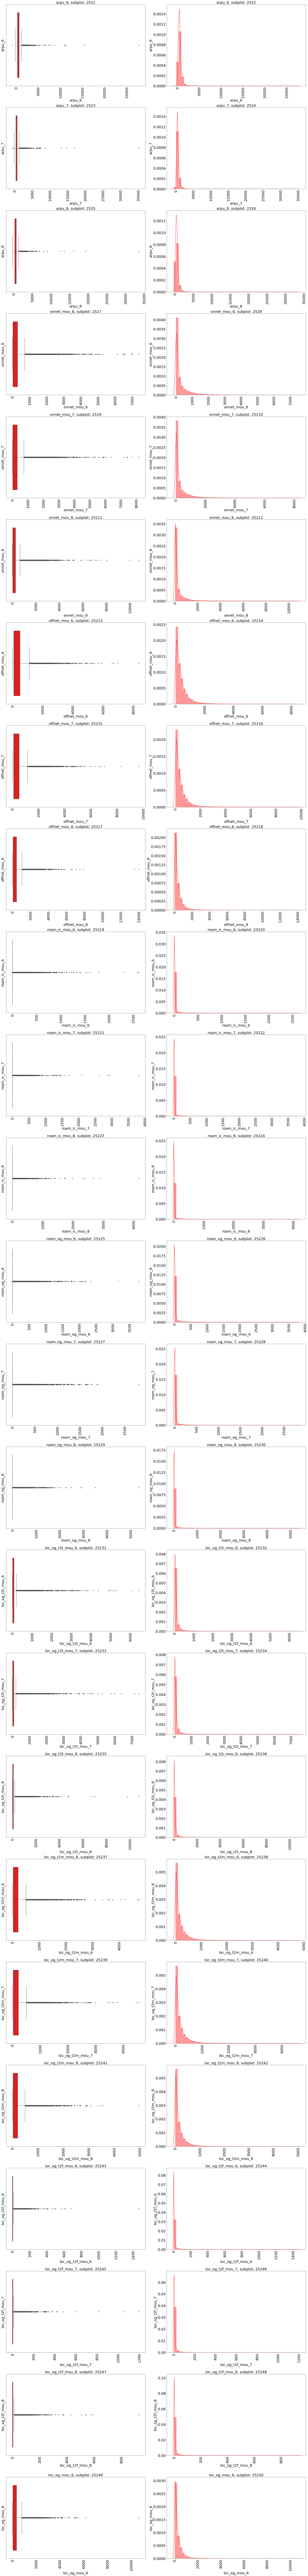

In [95]:
# Batch 1
plot_box_dist(0,25,25,filtered_prime)

In [ ]:
# Batch 2
plot_box_dist(25,50,25,filtered_prime)

In [ ]:
# Batch 3
plot_box_dist(50,75,25,filtered_prime)

In [ ]:
# Batch 4
plot_box_dist(75,97,23,filtered_prime)

### Outlier Treatment

In [96]:
# Let's see the outliers on each perecentiles level
filtered_prime.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28163.000000  28163.000000  28163.000000  28163.000000  28163.000000   
mean     561.489279    572.836869    528.992500    265.671912    276.742606   
std      449.110299    479.722691    500.479643    458.807410    482.945814   
min     -810.661000   -622.509000   -345.129000      0.000000      0.000000   
1%        25.593560     43.687840      0.100000      0.000000      0.000000   
10%      183.592600    195.219400    126.512600      2.080000      1.942000   
25%      318.985000    324.922000    258.075500     20.280000     19.780000   
50%      486.084000    490.526000    445.338000     90.440000     90.540000   
75%      699.251500    705.983500    675.208500    299.950000    306.945000   
90%      989.388800   1002.784200    992.278400    761.160000    803.190000   
95%     1233.316900   1268.796100   1267.645200   1135.293000   1206.305000   
99%     1956.684860   1999.516720   1989.353620   2147.356400   2220.590400   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28163.000000  28163.000000  28163.000000  28163.000000   28163.000000   
mean     246.288657    379.511912    390.261793    351.089623      16.352159   
std      465.372774    477.187560    501.053439    482.498518      75.823777   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.930000     18.532000     18.310000     10.830000       0.000000   
25%       15.340000     81.050000     81.100000     62.040000       0.000000   
50%       75.110000    232.110000    232.810000    202.140000       0.000000   
75%      259.685000    494.450000    507.720000    459.160000       0.000000   
90%      690.952000    897.422000    930.870000    845.310000      28.840000   
95%     1105.455000   1251.607000   1291.168000   1186.976000      87.039000   
99%     2185.196800   2294.596000   2413.013600   2202.410600     344.821800   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28163.000000   28163.000000   28163.000000   28163.000000   
mean       12.912045      13.145865      26.923494      20.591421   
std        76.601091      76.125433     116.586425      97.777508   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.954000      16.826000      52.122000      32.020000   
95%        57.461000      59.989000     147.902000     108.082000   
99%       287.024400     290.295000     531.215400     445.860000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   28163.000000      28163.000000      28163.000000      28163.000000   
mean       20.926258         87.154324         89.424203         82.376724   
std       107.722393        232.347149        245.864931        233.412303   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.030000          0.000000   
25%         0.000000          5.360000          5.860000          4.230000   
50%         0.000000         26.260000         27.030000         23.960000   
75%         0.000000         81.050000         82.630000         77.320000   
90%        32.170000        193.650000

**Removing the entries above 99 percentile and below 1 percentile**

In [97]:
# Removing the entries above 99 percentile and below 1 percentile
cols = [col for col in list(filtered_prime) if col not in ["churn","mobile_number"]]
print(len(cols))

96


In [98]:
for col in cols:
    ptls = filtered_prime[col].quantile([0.01,0.99]).values
    filtered_prime[col][filtered_prime[col] <= ptls[0]] = ptls[0]
    filtered_prime[col][filtered_prime[col] >= ptls[1]] = ptls[1]

ptls

array([   0.  , 6272.38])

In [99]:
#Sanity Checking
filtered_prime.shape

(28163, 97)

In [100]:
# Checking the percentile values to check whether outliers are removed or not
filtered_prime.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28163.000000  28163.000000  28163.000000  28163.000000  28163.000000   
mean     552.391627    563.068270    518.499873    257.099201    267.638037   
std      350.380797    356.034095    376.827606    402.713132    422.762043   
min       25.593560     43.687840      0.100000      0.000000      0.000000   
1%        25.602513     43.695379      0.100000      0.000000      0.000000   
10%      183.592600    195.219400    126.512600      2.080000      1.942000   
25%      318.985000    324.922000    258.075500     20.280000     19.780000   
50%      486.084000    490.526000    445.338000     90.440000     90.540000   
75%      699.251500    705.983500    675.208500    299.950000    306.945000   
90%      989.388800   1002.784200    992.278400    761.160000    803.190000   
95%     1233.316900   1268.796100   1267.645200   1135.293000   1206.305000   
99%     1956.532427   1999.506354   1989.271396   2146.583632   2220.571552   
max     1956.684860   1999.516720   1989.353620   2147.356400   2220.590400   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28163.000000  28163.000000  28163.000000  28163.000000   28163.000000   
mean     237.008897    371.814459    381.531272    341.256450      13.876733   
std      398.190017    429.242875    445.169497    411.800830      49.869704   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.930000     18.532000     18.310000     10.830000       0.000000   
25%       15.340000     81.050000     81.100000     62.040000       0.000000   
50%       75.110000    232.110000    232.810000    202.140000       0.000000   
75%      259.685000    494.450000    507.720000    459.160000       0.000000   
90%      690.952000    897.422000    930.870000    845.310000      28.840000   
95%     1105.455000   1251.607000   1291.168000   1186.976000      87.039000   
99%     2183.698384   2294.431080   2412.019368   2200.674228     344.795884   
max     2185.196800   2294.596000   2413.013600   2202.410600     344.821800   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28163.000000   28163.000000   28163.000000   28163.000000   
mean        9.928642      10.347125      23.087023      17.060319   
std        39.589489      40.507264      79.656519      63.995408   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.954000      16.826000      52.122000      32.020000   
95%        57.461000      59.989000     147.902000     108.082000   
99%       286.934872     290.118300     530.902052     445.506600   
max       287.024400     290.295000     531.215400     445.860000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    28163.00000      28163.000000      28163.000000      28163.000000   
mean        16.98945         78.792962         80.232136         73.861868   
std         63.21336        152.211877        154.954219        141.705917   
min          0.00000          0.000000          0.000000          0.000000   
1%           0.00000          0.000000          0.000000          0.000000   
10%          0.00000          0.000000          0.030000          0.000000   
25%          0.00000          5.360000          5.860000          4.230000   
50%          0.00000         26.260000         27.030000         23.960000   
75%          0.00000         81.050000         82.630000         77.320000   
90%         32.17000        193.650000

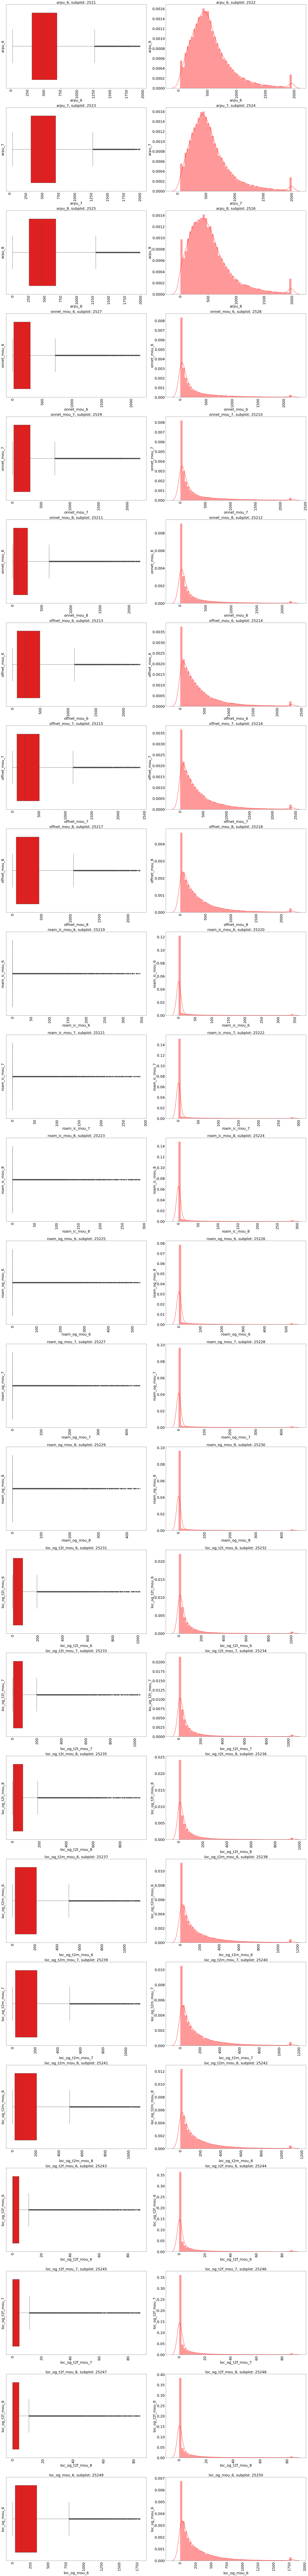

In [101]:
# Cross checking if outliers are removed or not by ploting batch 1 again

# Batch 1
plot_box_dist(0,25,25,filtered_prime)

**Observations** : Now all the outliers are removed

## Visualising the Data
**WRT Churn or not churn**

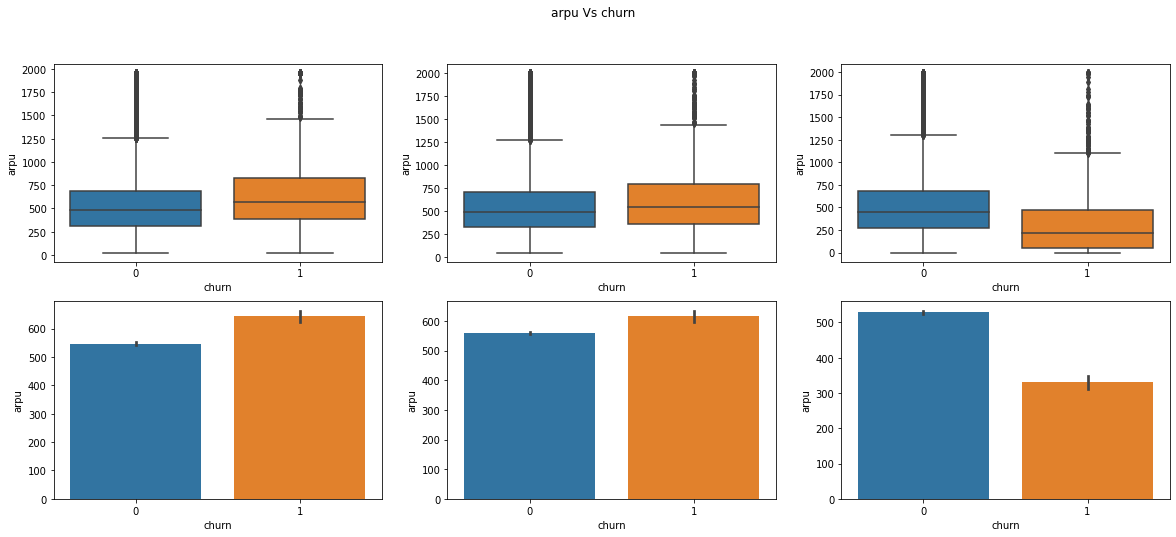

In [102]:
#arpu
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'arpu'
hue_name = '' 
plot_title = 'arpu Vs churn'
x_label = 'churn'
y_label = 'arpu'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

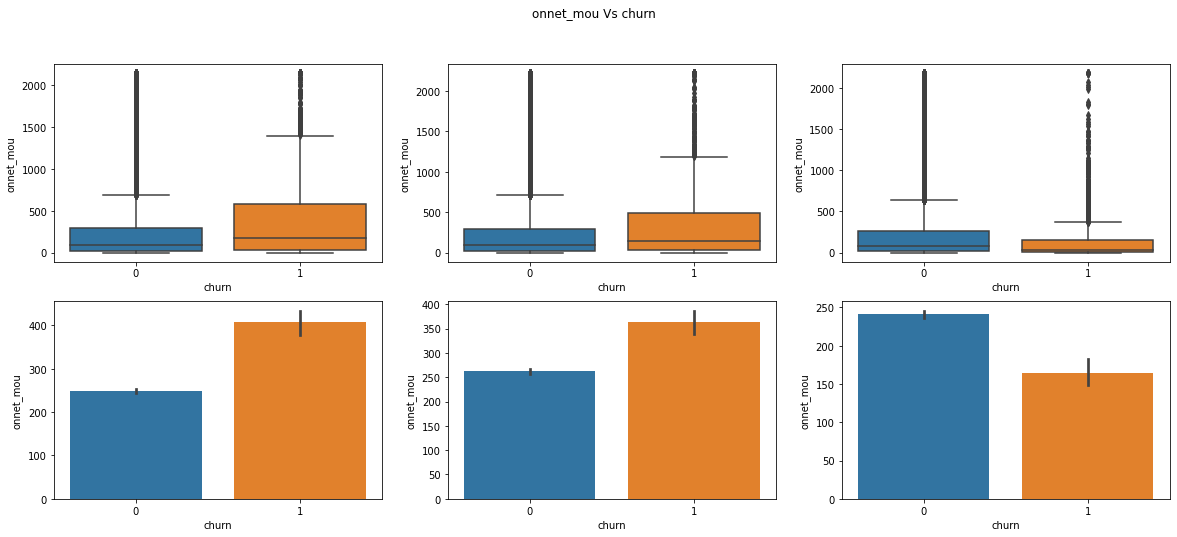

In [103]:
#onnet_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'onnet_mou'
hue_name = '' 
plot_title = 'onnet_mou Vs churn'
x_label = 'churn'
y_label = 'onnet_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

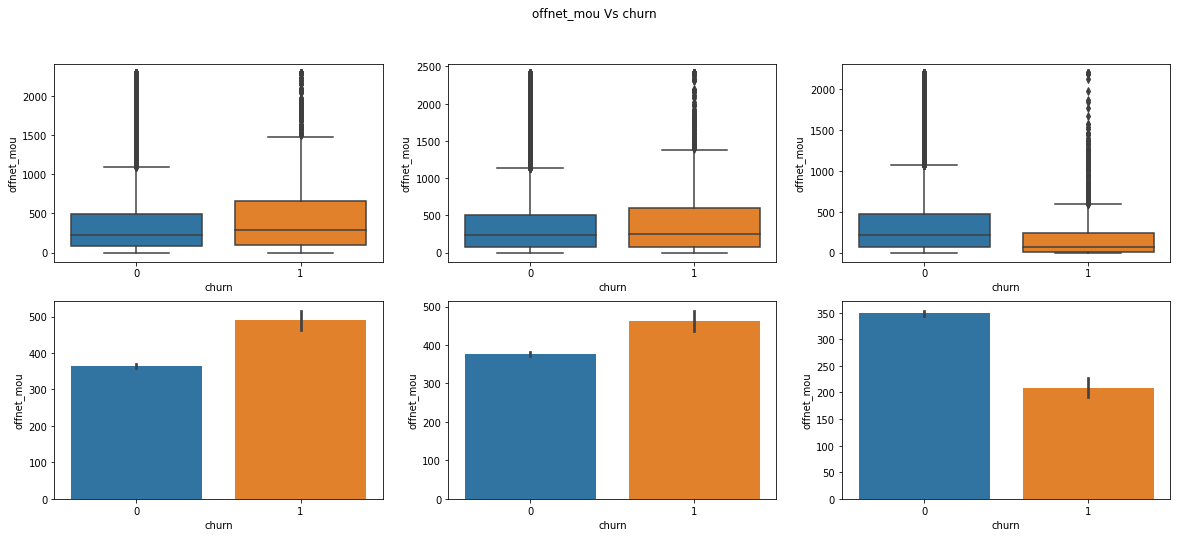

In [104]:
#offnet_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'offnet_mou'
hue_name = '' 
plot_title = 'offnet_mou Vs churn'
x_label = 'churn'
y_label = 'offnet_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

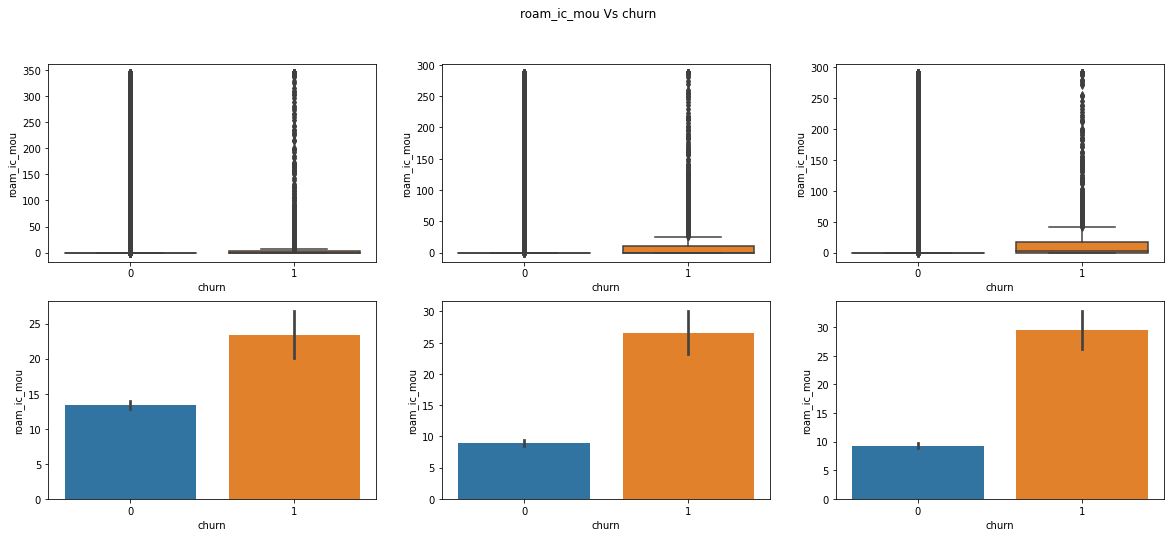

In [105]:
#roam_ic_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'roam_ic_mou'
hue_name = '' 
plot_title = 'roam_ic_mou Vs churn'
x_label = 'churn'
y_label = 'roam_ic_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

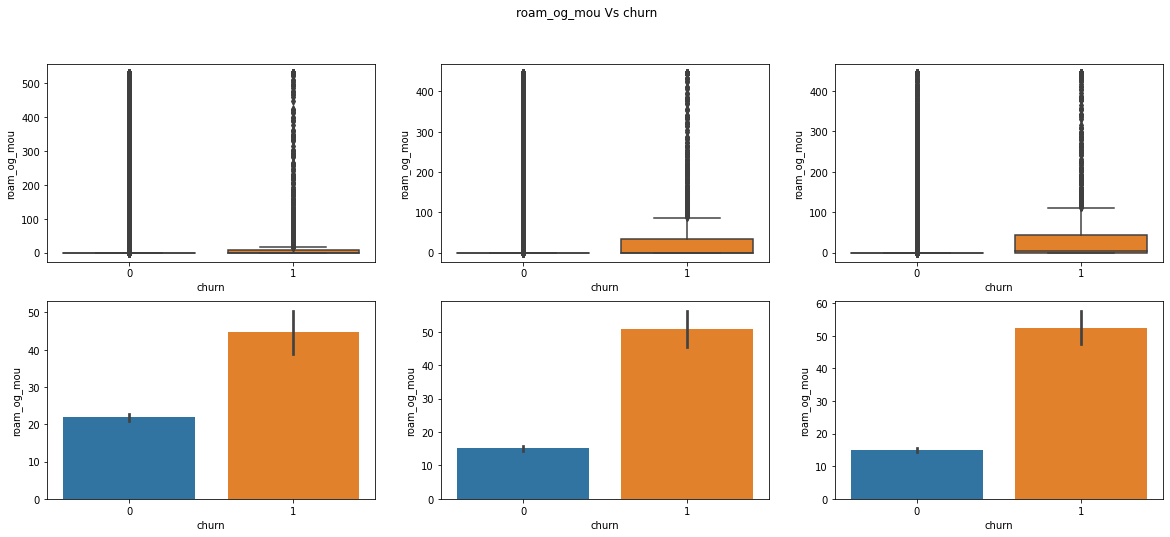

In [106]:
#roam_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'roam_og_mou'
hue_name = '' 
plot_title = 'roam_og_mou Vs churn'
x_label = 'churn'
y_label = 'roam_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

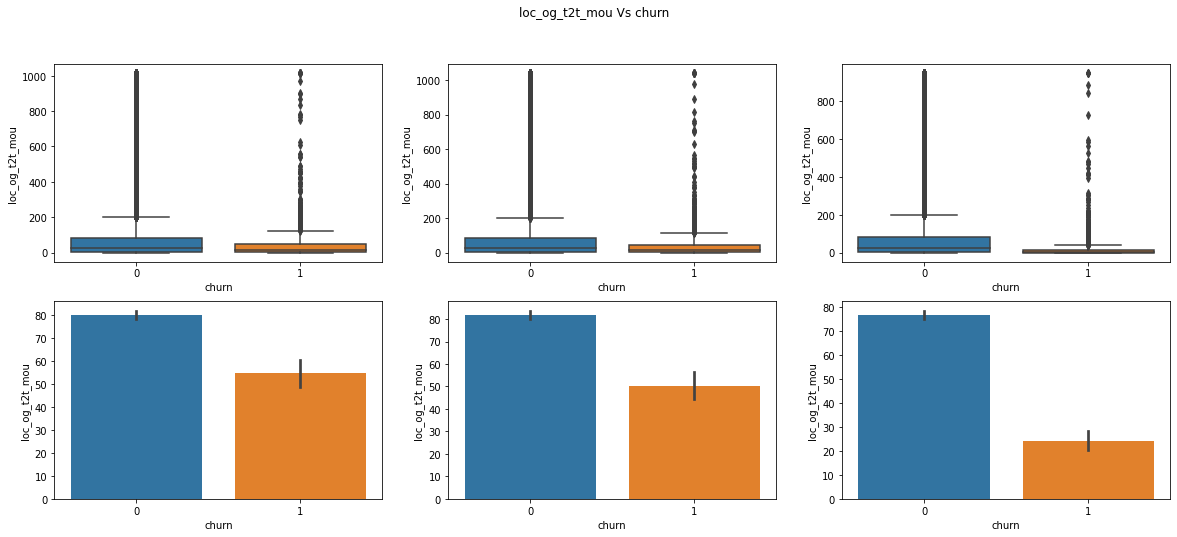

In [107]:
#loc_og_t2t_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_og_t2t_mou'
hue_name = '' 
plot_title = 'loc_og_t2t_mou Vs churn'
x_label = 'churn'
y_label = 'loc_og_t2t_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

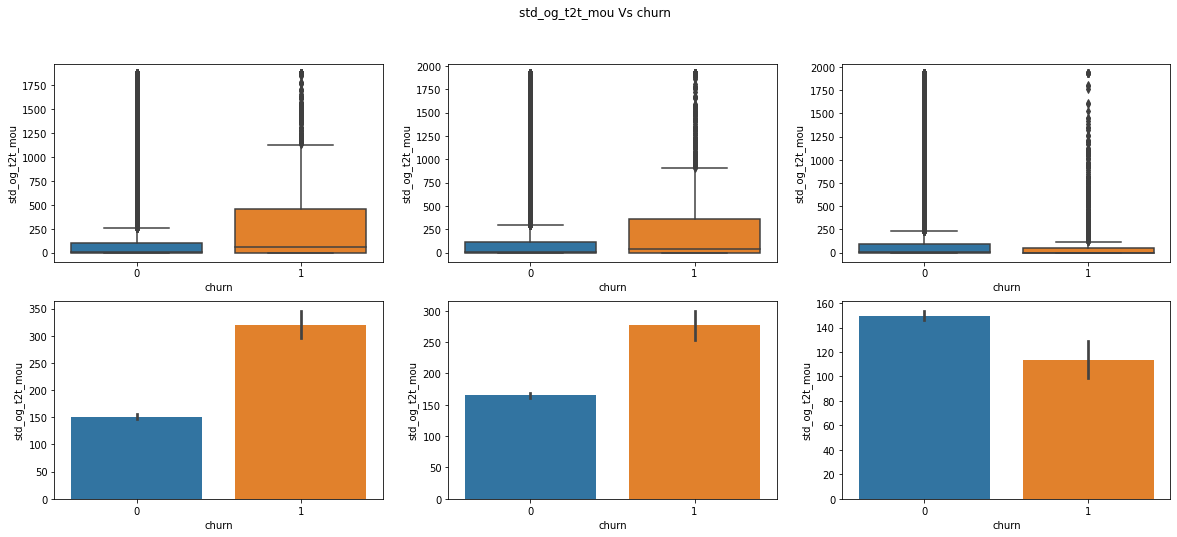

In [108]:
#std_og_t2t_mou
dataframe_name = filtered_prime

x_data = 'churn'
y_data = 'std_og_t2t_mou'
hue_name = '' 
plot_title = 'std_og_t2t_mou Vs churn'
x_label = 'churn'
y_label = 'std_og_t2t_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

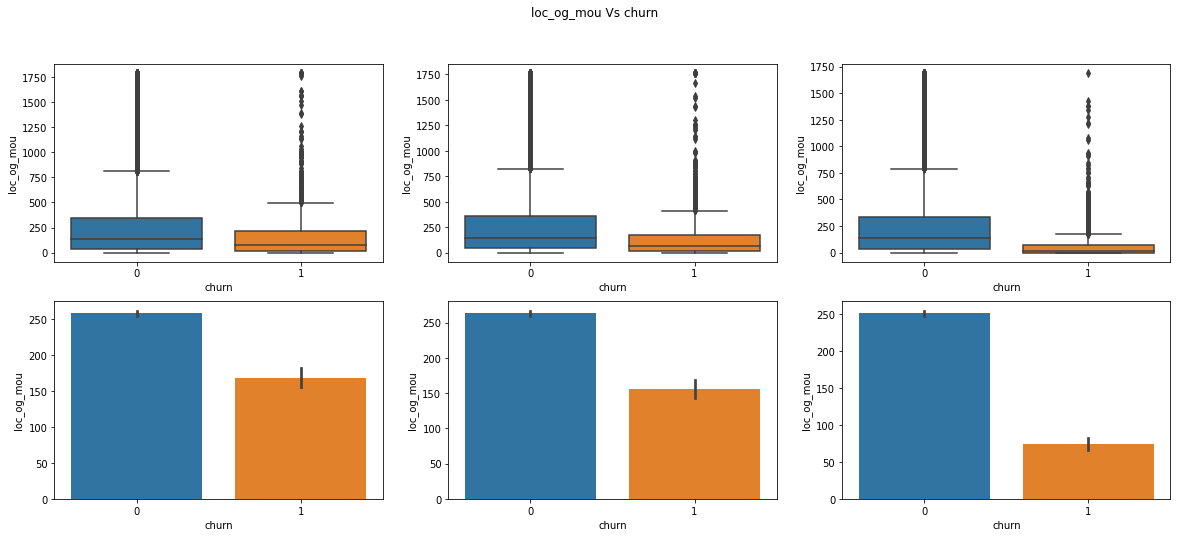

In [109]:
#loc_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_og_mou'
hue_name = '' 
plot_title = 'loc_og_mou Vs churn'
x_label = 'churn'
y_label = 'loc_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

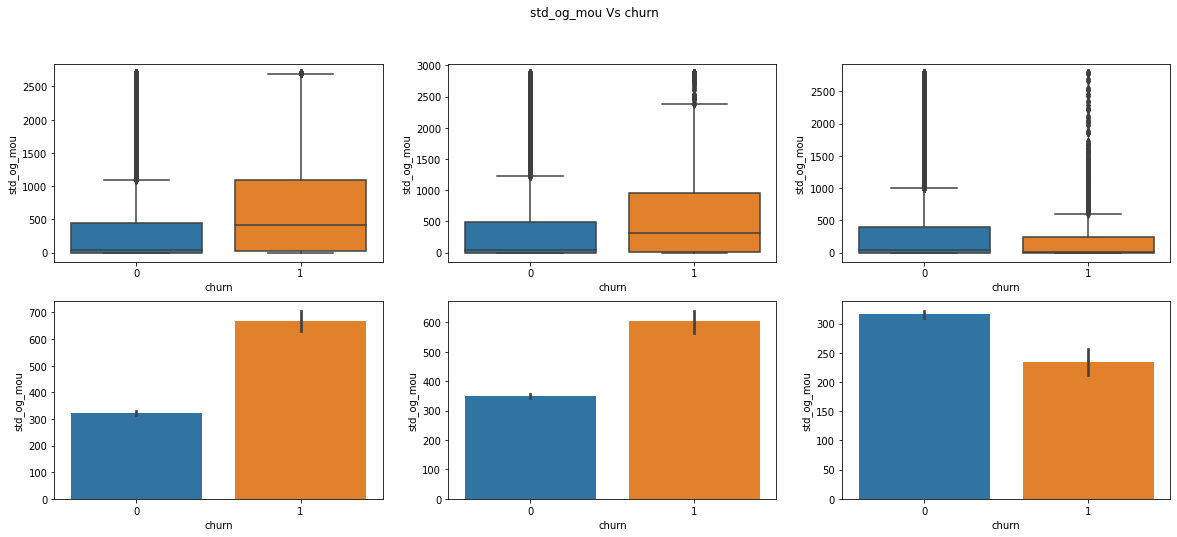

In [110]:
#std_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'std_og_mou'
hue_name = '' 
plot_title = 'std_og_mou Vs churn'
x_label = 'churn'
y_label = 'std_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

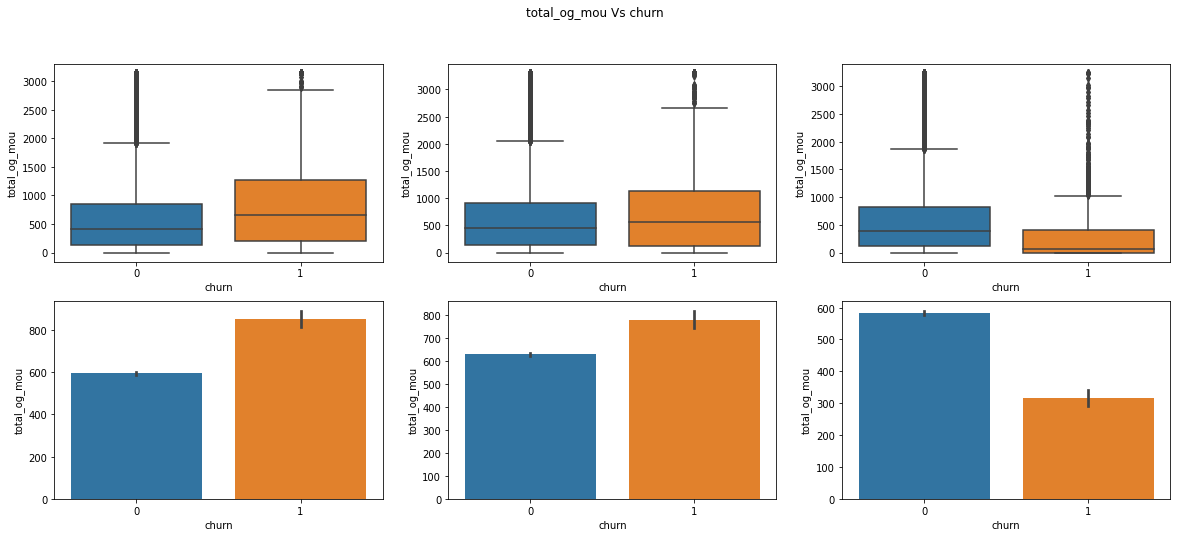

In [111]:
#total_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'total_og_mou'
hue_name = '' 
plot_title = 'total_og_mou Vs churn'
x_label = 'churn'
y_label = 'total_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

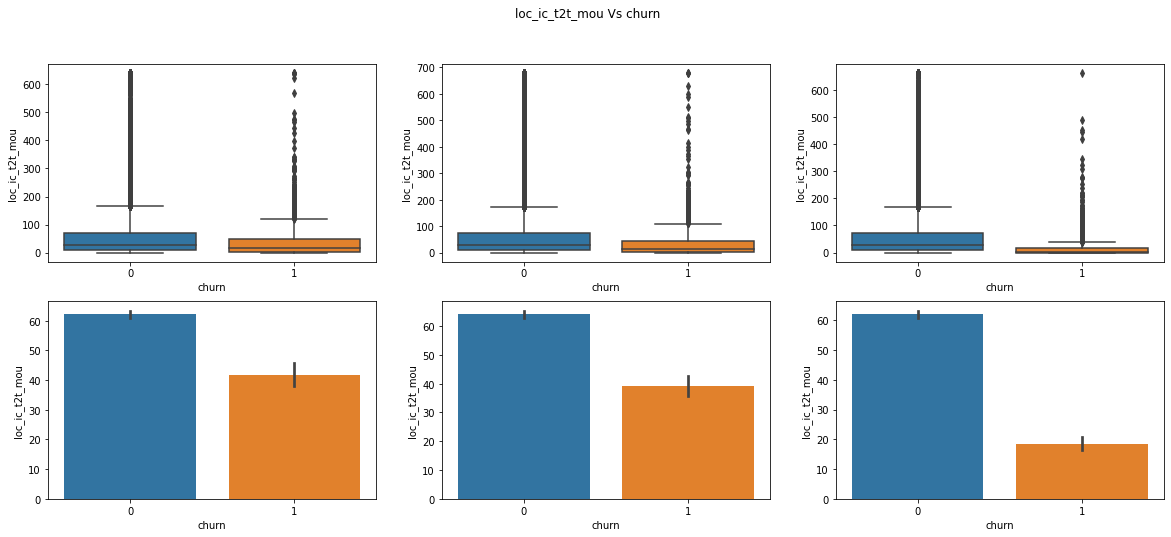

In [112]:
#loc_ic_t2t_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_t2t_mou'
hue_name = '' 
plot_title = 'loc_ic_t2t_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_t2t_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

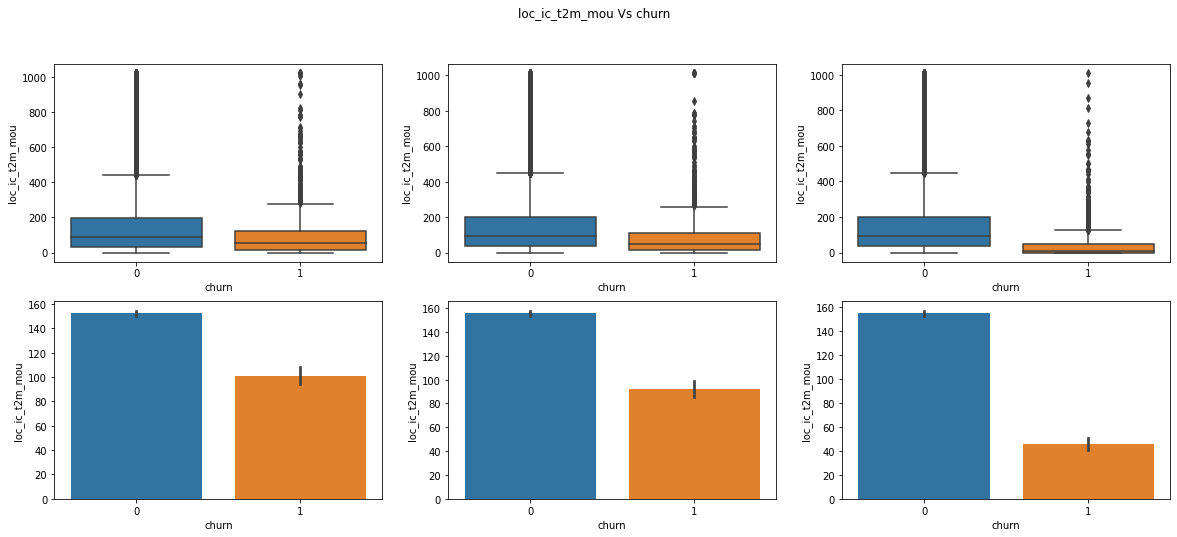

In [113]:
#loc_ic_t2m_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_t2m_mou'
hue_name = '' 
plot_title = 'loc_ic_t2m_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_t2m_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

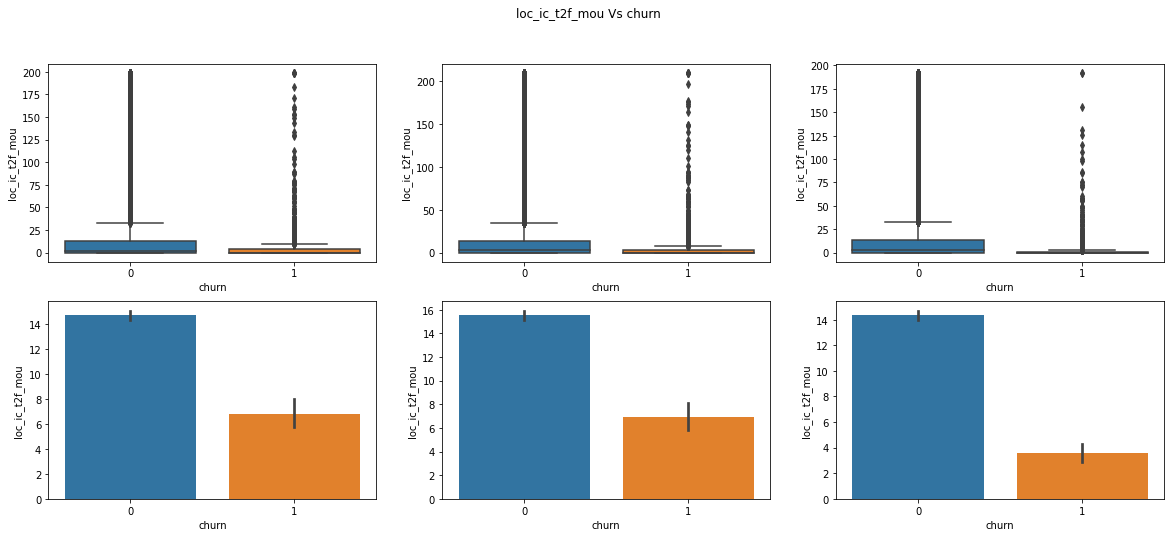

In [114]:
#loc_ic_t2f_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_t2f_mou'
hue_name = '' 
plot_title = 'loc_ic_t2f_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_t2f_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

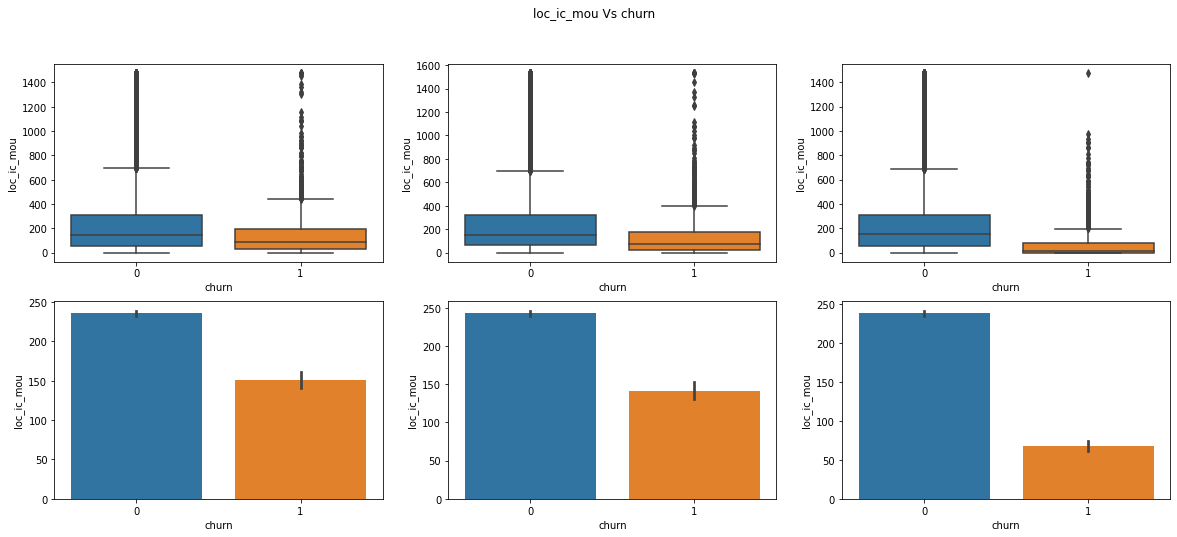

In [115]:
#loc_ic_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_mou'
hue_name = '' 
plot_title = 'loc_ic_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

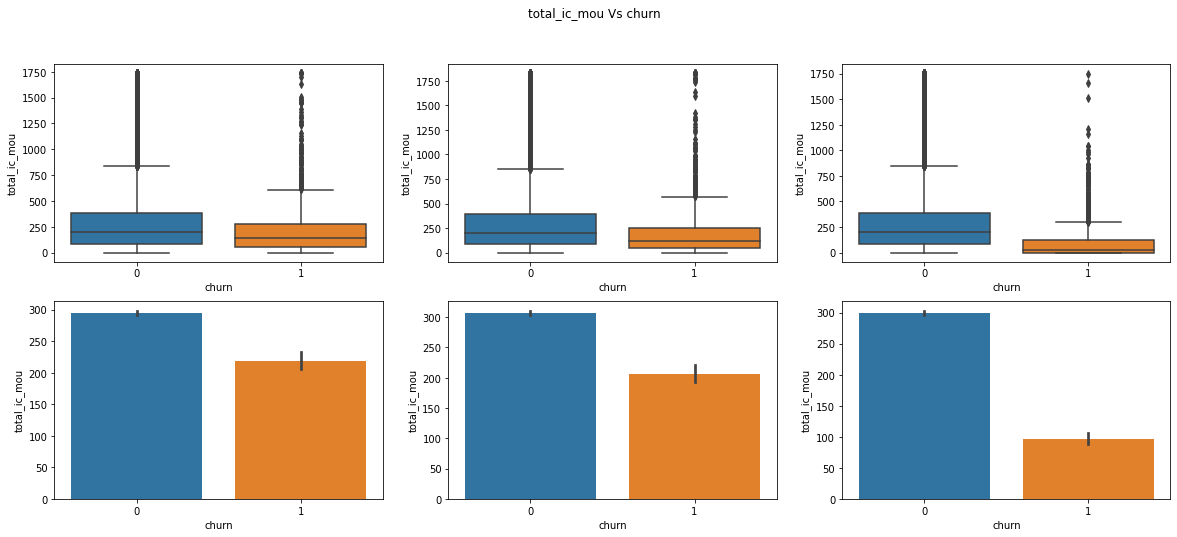

In [116]:
#total_ic_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'total_ic_mou'
hue_name = '' 
plot_title = 'total_ic_mou Vs churn'
x_label = 'churn'
y_label = 'total_ic_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

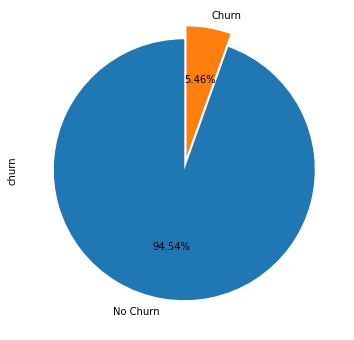

In [117]:
plt.figure(figsize=(10,6))
labels ="No Churn", "Churn"
filtered_prime["churn"].value_counts().plot.pie(explode=[0,0.10], autopct='%1.2f%%',\
                                                    labels=labels, startangle=90)
plt.show()

# Splitting the Data into Training and Testing Sets

Now the next step for regression is performing a train-test split and then scaling the variables

In [118]:
# Data holding
from sklearn.model_selection import train_test_split

y = filtered_prime['churn']
X = filtered_prime.drop(['churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19714, 96)
(19714,)
(8449, 96)
(8449,)


**Handling Data Imbalance**

In [119]:
# As the data is imbalance we will perform SMOTE on training data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train = y_train_oversampled
print(X_train.shape)
print(y_train.shape)

(37270, 96)
(37270,)


In [120]:
# Checking data balance after over sampling
print(pd.DataFrame(y_train).value_counts())

churn
1        18635
0        18635
dtype: int64


**Scaling the data**

In [121]:
# Standardization and Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   124.488   698.638    42.427        16.36       213.58        19.89   
1   186.493   731.961   429.073        12.21        73.01        36.06   
2  1706.681   980.417  1111.327         0.00         1.93         1.94   
3    59.462    87.324    42.772         0.00         0.00         0.00   
4  1519.617  1221.369  1255.042       802.46       552.29       755.93   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        206.73       1490.09         74.16           0.00            0.0   
1        174.84        850.68        351.78           0.00            0.0   
2          1.61          9.66         76.13           0.00            0.0   
3          9.78          0.00          0.00           0.00            0.0   
4       1948.38       1385.44       1421.83         111.58            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00   
1           1.99           0.00            0.0          21.23   
2           0.00           0.00            0.0           0.00   
3           0.00           0.00            0.0           0.00   
4           0.00         394.41            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.30              0.88              1.41   
1             11.44             70.51             36.06             13.36   
2              0.00              1.93              1.94              1.61   
3              0.00              0.00              0.00              0.00   
4             33.98             40.91             83.31            273.71   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.06              3.39               0.0              0.00   
1            193.28             59.56               0.0              0.00   
2              8.83             15.33               0.0              0.83   
3              0.00              0.00               0.0              0.00   
4            263.53            358.06               0.0              0.00   

   loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00          1.41         16.36          4.28   
1              0.00         24.81        263.79         95.63   
2             25.48          1.61         11.59         42.76   
3              0.00          0.00          0.00          0.00   
4              0.00        307.69        304.44        441.38   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0             16.36            213.28             19.01            192.88   
1              0.76              2.50              0.00            139.93   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              0.00              0.00   
4            722.11            511.38            672.61           1327.63   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_6  \
0           1428.01             69.86              0.00        209.24   
1            620.63            270.18              0.00        140.69   
2              0.00              0.00             32.71          0.00   
3              0.00              0.00              0.00          0.00   
4           1121.91           1063.76              0.00       2049.74   

   std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_8  total_og_mou_6  \
0       1641.29         88.88         19.99          4.43          230.66   
1        623.13        270.18         22.19         19.71          187.88   
2          0.00         32.71          0.70          0.00            2.31   
3          0.00          0.00          9.78          0.00            9.78   
4       1633.29       1736.38          4.64          2.08         2373.19   

   total_og_mou_7  total

In [122]:
# Scaling the training and testing data

x_train_columns=X_train.columns
x_test_columns=X_test.columns

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=x_train_columns)
X_test = pd.DataFrame(X_test, columns=x_test_columns)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [123]:
#Sanity Check
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.051212  0.334871  0.021278     0.007619     0.096182     0.009102   
1  0.083320  0.351909  0.215645     0.005686     0.032879     0.016502   
2  0.870538  0.478942  0.558615     0.000000     0.000869     0.000888   
3  0.017538  0.022311  0.021451     0.000000     0.000000     0.000000   
4  0.773668  0.602139  0.630861     0.373697     0.248713     0.345932   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.090094      0.617522      0.033672       0.000000            0.0   
1      0.076196      0.352538      0.159725       0.000000            0.0   
2      0.000702      0.004003      0.034567       0.000000            0.0   
3      0.004262      0.000000      0.000000       0.000000            0.0   
4      0.849117      0.574153      0.645579       0.323587            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       0.000000       0.000000            0.0       0.000000   
1       0.006855       0.000000            0.0       0.047747   
2       0.000000       0.000000            0.0       0.000000   
3       0.000000       0.000000            0.0       0.000000   
4       0.000000       0.742467            0.0       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          0.000000          0.000288          0.000930          0.001239   
1          0.011260          0.067704          0.038089          0.011736   
2          0.000000          0.001853          0.002049          0.001414   
3          0.000000          0.000000          0.000000          0.000000   
4          0.033444          0.039282          0.087998          0.240431   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          0.014279          0.003087               0.0          0.000000   
1          0.171851          0.054230               0.0          0.000000   
2          0.007851          0.013958               0.0          0.009422   
3          0.000000          0.000000               0.0          0.000000   
4          0.234312          0.326018               0.0          0.000000   

   loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0          0.000000      0.000787      0.009268      0.002533   
1          0.000000      0.013854      0.149434      0.056592   
2          0.303089      0.000899      0.006566      0.025304   
3          0.000000      0.000000      0.000000      0.000000   
4          0.000000      0.171810      0.172462      0.261199   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0          0.008715          0.110826          0.009824          0.099801   
1          0.000405          0.001299          0.000000          0.072404   
2          0.000000          0.000000          0.000000          0.000000   
3          0.000000          0.000000          0.000000          0.000000   
4          0.384648          0.265727          0.347601          0.686953   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_6  \
0          0.671340          0.036568          0.000000      0.077365   
1          0.291772          0.141426          0.000000      0.052019   
2          0.000000          0.000000          0.909298      0.000000   
3          0.000000          0.000000          0.000000      0.000000   
4          0.527435          0.556827          0.000000      0.757877   

   std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_8  total_og_mou_6  \
0      0.570025      0.031908      0.291165      0.060931        0.073375   
1      0.216415      0.096996      0.323209      0.271094        0.059766   
2      0.000000      0.011743      0.010196      0.000000        0.000735   
3      0.000000      0.000000      0.142451      0.000000        0.003111   
4      0.567247      0.623371      0.067584      0.028609        0.754932   

   total_og_mou_7  total

In [124]:
#Sanity Check
print(X_train.shape)
y_train = y_train.values.reshape(-1)
print(y_train.shape)

(37270, 96)
(37270,)


## Now we have two objectives

1. Building a strong predective model to classify churn vs not churn
2. Identify the important features

**We will first build a Logistic Regression Model to identify few important features**
1. We will perform RFE and p-values test for feature selection in the approach
2. After LR we will perform PCA for dimentioanlity reduction and perform tree models on top of it.

## Logistic Regression Model

In [125]:
import statsmodels.api as sm

In [126]:
# First logistic regression model with all the available features
X_train_sm = sm.add_constant(X_train)
x_train_sm_columns =  x_train_columns.insert(0,'const')
X_train_sm = pd.DataFrame(sm.add_constant(X_train), columns = x_train_sm_columns)

logm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37270
Model:                            GLM   Df Residuals:                    37173
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12275.
Date:                Sun, 26 Sep 2021   Deviance:                       24550.
Time:                        17:51:25   Pearson chi2:                 2.52e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.6964      0.145     39.386      0.000       5.413       5.980
arpu_6                      -0.1929      0.416     -0.464      0.643      -1.008       0.623
arpu_7                       1.0839      0.418      2.591      0.010       0.264       1.904
arpu_8                       3.1584      0.457      6.911      0.000       2.263       4.054
onnet_mou_6                  1.9066      0.882      2.163      0.031       0.179       3.634
onnet_mou_7                  4.1957      0.920      4.559      0.000       2.392       5.999
onnet_mou_8                 -4.8730      0.870     -5.604      0.000      -6.578      -3.169
offnet_mou_6                 0.6987      0.847      0.825      0.410      -0.962       2.360
offnet_mou_7                 4.5033      1.019      4.420      0.000       2.506       6.500
offnet_mou_8                -4.2700      0.805     -5.304      0.000      -5.848      -2.692
roam_ic_mou_6               -0.3296      0.231     -1.427      0.153      -0.782       0.123
roam_ic_mou_7                1.1361      0.247      4.604      0.000       0.652       1.620
roam_ic_mou_8                0.0417      0.212      0.197      0.844      -0.374       0.458
roam_og_mou_6               -0.3202      0.286     -1.119      0.263      -0.881       0.241
roam_og_mou_7               -0.8343      0.284     -2.940      0.003      -1.391      -0.278
roam_og_mou_8                2.4729      0.263      9.395      0.000       1.957       2.989
loc_og_t2t_mou_6             1.6233      0.792      2.050      0.040       0.071       3.176
loc_og_t2t_mou_7            -4.1154      0.817     -5.039      0.000      -5.716      -2.515
loc_og_t2t_mou_8            -0.3161      0.898     -0.352      0.725      -2.077       1.445
loc_og_t2m_mou_6             1.0085      0.834      1.209      0.227      -0.627       2.644
loc_og_t2m_mou_7            -4.9441      0.813     -6.084      0.000      -6.537      -3.351
loc_og_t2m_mou_8             0.3886      0.968      0.401      0.688      -1.508       2.286
loc_og_t2f_mou_6             0.4159      0.275      1.512      0.131      -0.123       0.955
loc_og_t2f_mou_7            -1.9753      0.307     -6.441      0.000      -2.576      -1.374
loc_og_t2f_mou_8             0.6796      0.271      2.509      0.012       0.149       1.211
loc_og_mou_6                -3.1024      1.638     -1.894      0.058      -6.313       0.108
loc_og_mou_7                 4.2012      1.419      2.960      0.003       1.419       6.983
loc_og_mou_8                 5.2369      1.757      2.980      0.003       1.793       8.681
std_og_t2t_mou_6            -0.2427      0.834     -0.291      0.771      -1.877       1.391
std_og_t2t_mou_7            -3.5833      0.845     -4.242      0.000      -5.239      -1.928
std_og_t2t_mou

In [127]:
# Few features has the p-value > 0; we will remove them using RFE and select top 40 features from 96 available
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 40)
rfe = rfe.fit(X_train, y_train)

# Columns selected after RFE
col = X_train.columns[rfe.support_]
print(len(col))
col

40


Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2m_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'vol_3g_mb_6',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'total_data_rech_amt_7'],
      dtype='object')

In [128]:
# Storing the result afteh RFE in new dataframe for further processing
X_train_RFE = X_train[col]
X_test_RFE = X_test[col]

x_train_sm_columns =  col.insert(0,'const')
X_train_sm = pd.DataFrame(sm.add_constant(X_train_RFE), columns = x_train_sm_columns)

#building second LGR model with filtered features
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37270
Model:                            GLM   Df Residuals:                    37229
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12603.
Date:                Sun, 26 Sep 2021   Deviance:                       25206.
Time:                        17:53:05   Pearson chi2:                 1.95e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.8294      0.090     53.838      0.000       4.654       5.005
arpu_7                    1.0649      0.210      5.076      0.000       0.654       1.476
arpu_8                    2.2601      0.256      8.820      0.000       1.758       2.762
onnet_mou_7               3.8626      0.570      6.775      0.000       2.745       4.980
onnet_mou_8              -4.8787      0.395    -12.362      0.000      -5.652      -4.105
offnet_mou_7              1.9031      0.195      9.740      0.000       1.520       2.286
offnet_mou_8             -3.3514      0.411     -8.158      0.000      -4.157      -2.546
roam_og_mou_8             2.5578      0.133     19.252      0.000       2.297       2.818
loc_og_t2t_mou_7         -3.4658      0.554     -6.253      0.000      -4.552      -2.380
loc_og_t2m_mou_7         -4.0464      0.551     -7.349      0.000      -5.126      -2.967
loc_og_t2f_mou_7         -1.3439      0.172     -7.801      0.000      -1.682      -1.006
loc_og_mou_7              3.4154      0.801      4.264      0.000       1.846       4.985
std_og_t2t_mou_7         -2.8085      0.481     -5.837      0.000      -3.752      -1.865
std_og_t2m_mou_8         -2.4259      0.494     -4.915      0.000      -3.393      -1.459
std_og_mou_8              3.6282      0.468      7.752      0.000       2.711       4.546
loc_ic_t2t_mou_6          3.2511      0.445      7.308      0.000       2.379       4.123
loc_ic_t2t_mou_7         -2.3267      0.405     -5.741      0.000      -3.121      -1.532
loc_ic_t2t_mou_8         -1.5834      0.392     -4.041      0.000      -2.351      -0.815
loc_ic_t2m_mou_6          4.2963      0.627      6.847      0.000       3.066       5.526
loc_ic_t2m_mou_8         -2.5911      0.420     -6.167      0.000      -3.415      -1.768
loc_ic_mou_6             -6.8837      0.877     -7.845      0.000      -8.603      -5.164
loc_ic_mou_7              3.3859      0.353      9.590      0.000       2.694       4.078
std_ic_t2m_mou_8         -1.8953      0.231     -8.189      0.000      -2.349      -1.442
total_ic_mou_6            1.8796      0.328      5.733      0.000       1.237       2.522
total_ic_mou_8           -3.0422      0.489     -6.218      0.000      -4.001      -2.083
spl_ic_mou_8             -2.3009      0.154    -14.900      0.000      -2.604      -1.998
total_rech_num_8         -1.7625      0.133    -13.224      0.000      -2.024      -1.501
date_of_last_rech_8      -3.9297      0.099    -39.661      0.000      -4.124      -3.736
last_day_rch_amt_8       -4.7167      0.140    -33.622      0.000      -4.992      -4.442
vol_3g_mb_6               1.7854      0.183      9.770      0.000       1.427       2.144
monthly_2g_6             -3.2258      0.170    -18.986      0.000      -3.559      -2.893
monthly_2g_7           

All the features now have 0 p-value; hence we will not reduce the feature count further

**Lets Evaluate the model with selected 40 features using RFE**

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

model = LogisticRegression()

model.fit(X_train[col], y_train)

# Predictions on train dataset
pred_train = model.predict_proba(X_train[col])
y_pred_train = model.predict(X_train[col])

# Predictions on test dataset
pred_test = model.predict_proba(X_test[col])
y_pred_test = model.predict(X_test[col])

In [131]:
print("Accuracy Score in train dataset:", accuracy_score(y_train, y_pred_train))
print("Accuracy Score in test dataset:", accuracy_score(y_test, y_pred_test))

Accuracy Score in train dataset: 0.8638583310973974
Accuracy Score in test dataset: 0.8369037755947449


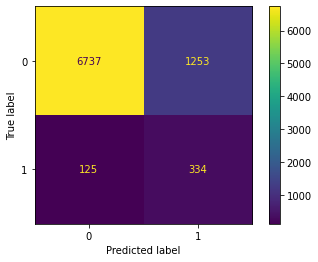

In [133]:
# Let us check how well our model is predicting 1's and 0's 
plot_confusion_matrix(model,X_test[col],y_test)
plt.show();

In [134]:
y_pred_df = pd.DataFrame(pred_train)
y_pred_df_test = pd.DataFrame(pred_test)

y_pred = y_pred_df.iloc[:,[1]]
y_pred_test = y_pred_df_test.iloc[:,[1]]

y_pred.reset_index(drop=True, inplace=True)
y_train_df = pd.DataFrame(y_train)
y_train_df.reset_index(drop=True, inplace=True)
y_pred_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_train_df, y_pred], axis=1)
y_pred_final_test = pd.concat([y_test, y_pred_test], axis=1)
 
y_pred_final = y_pred_final.rename(columns = {0:'churn', 1 : "churn_prob"}) #Renaming the column
y_pred_final_test = y_pred_final_test.rename(columns = { 1 : "churn_prob"})

In [135]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

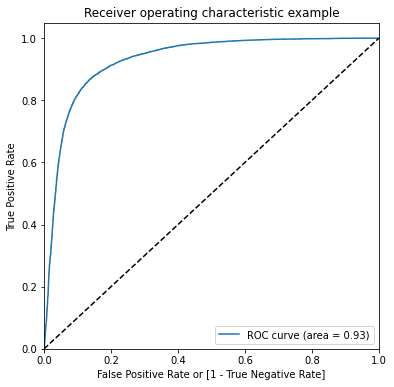

(array([0.00000000e+00, 5.36624631e-05, 5.36624631e-05, ...,
        9.99892675e-01, 9.99946338e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 5.36624631e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99873626e+00, 9.98736258e-01, 9.98609285e-01, ...,
        1.31496284e-07, 6.74250424e-08, 4.83856357e-08]))

In [136]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [137]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)

In [138]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  0.000000  1.000000
0.1   0.1  0.750148  0.515535  0.984760
0.2   0.2  0.804830  0.642715  0.966944
0.3   0.3  0.835283  0.727180  0.943386
0.4   0.4  0.853636  0.791468  0.915804
0.5   0.5  0.863858  0.845828  0.881889
0.6   0.6  0.862758  0.887899  0.837617
0.7   0.7  0.846633  0.921224  0.772042
0.8   0.8  0.804803  0.947733  0.661873
0.9   0.9  0.689455  0.973544  0.405366


<AxesSubplot:xlabel='prob'>

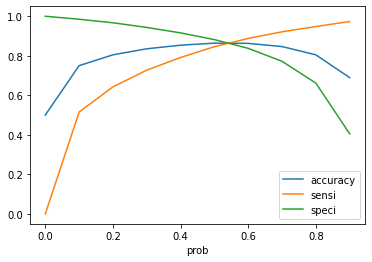

In [139]:
# Let's plot accuracy vs. sensitivity vs. specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [140]:
# Creating new column 'pred_churn' with 1 if churn_prob > 0.52 else 0
y_pred_final["pred_churn"] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.52 else 0)

y_pred_final.churn.value_counts()

1    18635
0    18635
Name: churn, dtype: int64

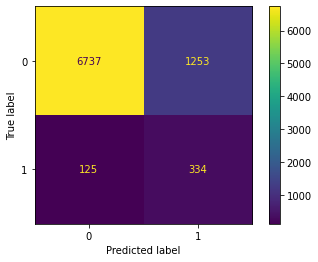

array([[15945,  2690],
       [ 2342, 16293]], dtype=int64)

In [141]:
# Let us check how well our model is predicting 1's and 0's 
plot_confusion_matrix(model,X_test[col],y_test)
plt.show();

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.pred_churn)
confusion

In [142]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_train, y_pred_final["pred_churn"]))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8649852428226456
Sensitivity:  0.8743225114032734
Specificity:  0.8556479742420177
False Postive Rate:  0.14435202575798228
Positive Predictive Value:  0.8582942632882052
Negative Predictive Value:  0.8719308798600098
Misclassification Rate:  0.13501475717735445


In [143]:
# Churn prediction in test dataset
y_pred_final_test["pred_churn"] = y_pred_final_test.churn_prob.map( lambda x: 1 if x > 0.50 else 0)
confusion = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.pred_churn)

TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_test, y_pred_final_test["pred_churn"]))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8369037755947449
Sensitivity:  0.7276688453159041
Specificity:  0.8431789737171465
False Postive Rate:  0.15682102628285358
Positive Predictive Value:  0.21045998739760555
Negative Predictive Value:  0.981783736519965
Misclassification Rate:  0.16309622440525506


In [144]:
# Identifying few top features
top_features = {
}

top_features['features'] = col
top_features['coeff'] = model.coef_[0]

In [145]:
top_features = pd.DataFrame(top_features)

print(top_features.sort_values(by='coeff')[:10])
print("\n")
print(top_features.sort_values(by='coeff', ascending=False)[:10])

               features     coeff
37          sachet_3g_8 -5.044677
31         monthly_2g_8 -5.032626
36         monthly_3g_8 -4.781134
27   last_day_rch_amt_8 -4.581273
33          sachet_2g_8 -4.028583
26  date_of_last_rech_8 -3.870289
3           onnet_mou_8 -3.387422
29         monthly_2g_6 -3.112620
19         loc_ic_mou_6 -2.930086
23       total_ic_mou_8 -2.912283


                 features     coeff
39  total_data_rech_amt_7  4.485628
2             onnet_mou_7  2.534977
6           roam_og_mou_8  2.503510
20           loc_ic_mou_7  2.449406
13           std_og_mou_8  2.053027
17       loc_ic_t2m_mou_6  1.846721
4            offnet_mou_7  1.731766
1                  arpu_8  1.672852
28            vol_3g_mb_6  1.649345
22         total_ic_mou_6  1.544138


### Model Building using PCA

**Now from here onward we will try to improve the model using feature selection, ensembling and PCA**

### PCA on the data

In [147]:
# Initializing PCA
pca = PCA(svd_solver = "randomized", random_state = 50)

In [149]:
# Performing PCA on X_train
pca.fit(X_train)

PCA(random_state=50, svd_solver='randomized')

In [150]:
# printing PCA components
pca.components_

array([[ 1.63836170e-01,  1.70890928e-01,  1.20041750e-01, ...,
        -5.79879658e-02, -6.13434069e-02, -5.81348706e-02],
       [ 6.58286953e-02,  1.00183735e-01,  1.65047716e-01, ...,
         6.11498333e-02,  1.11969090e-02,  1.24623813e-02],
       [-7.62112317e-02, -3.64412366e-02,  1.77438445e-02, ...,
         5.58261634e-02,  4.01379856e-02,  4.70331881e-02],
       ...,
       [-2.11598548e-03,  1.82841948e-02, -3.01832179e-03, ...,
         7.43909024e-04,  2.07693191e-03, -2.10548126e-03],
       [ 6.77669351e-03, -2.17539936e-03, -5.66830522e-03, ...,
        -3.95896672e-04, -2.64584716e-03,  1.47741878e-04],
       [-3.26821187e-03,  2.01659348e-03,  1.54750160e-03, ...,
        -1.24437034e-04, -9.50564781e-04,  9.13356575e-04]])

In [151]:
# Getting variance ratio for all components
pca.explained_variance_ratio_

array([1.70268116e-01, 1.35117840e-01, 6.52599205e-02, 6.12866710e-02,
       5.57913695e-02, 4.62668635e-02, 3.66748151e-02, 2.96123564e-02,
       2.63446294e-02, 2.18304715e-02, 2.04068658e-02, 1.78903036e-02,
       1.71365921e-02, 1.65516410e-02, 1.57330832e-02, 1.44775320e-02,
       1.38855832e-02, 1.30979780e-02, 1.24405746e-02, 1.17707838e-02,
       1.07462389e-02, 9.95385056e-03, 9.33338418e-03, 9.20960065e-03,
       8.02536601e-03, 7.54986377e-03, 7.43299173e-03, 6.79816950e-03,
       6.61928880e-03, 6.01413116e-03, 5.74264315e-03, 5.55990236e-03,
       5.43277785e-03, 5.29884202e-03, 5.21019283e-03, 5.15035249e-03,
       4.75935086e-03, 4.48388117e-03, 4.46737368e-03, 4.28120540e-03,
       4.02186003e-03, 3.95272242e-03, 3.72482554e-03, 3.42094224e-03,
       3.19020279e-03, 3.14541299e-03, 3.05340031e-03, 2.69280975e-03,
       2.58509736e-03, 2.38994718e-03, 2.23869784e-03, 2.12569145e-03,
       1.99330098e-03, 1.88929633e-03, 1.85608461e-03, 1.65022814e-03,
      

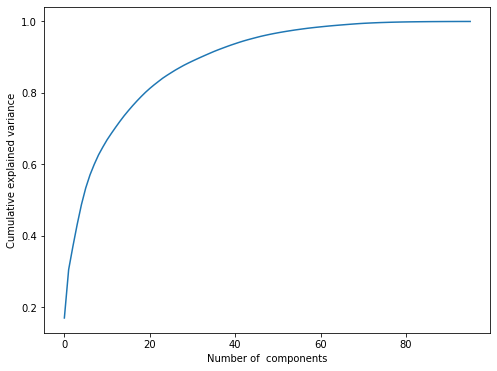

In [152]:
# Plotting a graph to decide the number of components required to capture variance around 90%
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of  components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [157]:
#We will select around 20 components as it can capture ~90% variance
pca_final = IncrementalPCA(n_components=20) # 20 components are enough to explain ~90% variance

X_train_pca = pca_final.fit_transform(X_train) # PCA on train dataset
X_train_pca.shape

(37270, 20)

In [158]:
# Maximum and minimum correlations after PCA
corr = np.corrcoef(X_train_pca.transpose())
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max_corr:", corr_nodiag.max(), "and", "min_corr:", corr_nodiag.min(),)

max_corr: 0.009343938490666172 and min_corr: -0.013686703763982315


**Observations** : We can notice that after PCA we dont have any multicolinearity

In [159]:
# applying PCA on test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8449, 20)

# Random Forest with PCA

In [160]:
# We will first perform it without hyper-parameter tuning
rf_balanced = RandomForestClassifier(class_weight="balanced_subsample", n_estimators = 1000, max_depth = 6,
                                     min_samples_split=5)

In [161]:
# Traininf the Random Forest model 
trained_rf = rf_balanced.fit(X_train_pca, y_train)

In [163]:
# Evaluating the model performace on training and testing
pred_rf_train = trained_rf.predict(X_train_pca)
pred_rf_test = trained_rf.predict(X_test_pca)
pred_prob_rf_train = trained_rf.predict_proba(X_train_pca)[:,1]
pred_prob_rf_test = trained_rf.predict_proba(X_test_pca)[:,1]

accuracy_train = metrics.accuracy_score(y_train, pred_rf_train)
accuracy_test = metrics.accuracy_score(y_test, pred_rf_test)

print("Accuracy in train dataset:", accuracy_train)
print("Accuracy in test dataset:", accuracy_test)

print("\n\nClassification report on train dataset:", "\n", classification_report(y_train, pred_rf_train))
print("\nClassification report on test dataset:", "\n", classification_report(y_test, pred_rf_test)) 

Accuracy in train dataset: 0.8497987657633486
Accuracy in test dataset: 0.8332347023316369


Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     18635
           1       0.85      0.84      0.85     18635

    accuracy                           0.85     37270
   macro avg       0.85      0.85      0.85     37270
weighted avg       0.85      0.85      0.85     37270


Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      7990
           1       0.20      0.68      0.31       459

    accuracy                           0.83      8449
   macro avg       0.59      0.76      0.61      8449
weighted avg       0.94      0.83      0.87      8449



ROC AUC in train dataset 0.9267004330792585


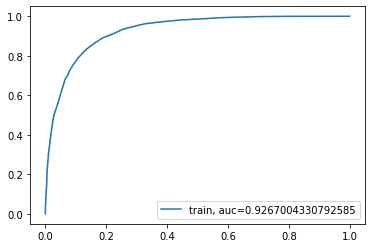

In [164]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_rf_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.839476633373416


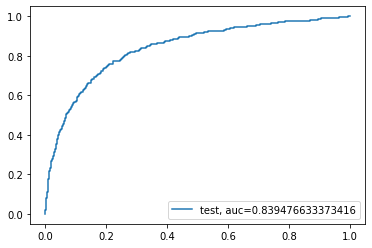

In [165]:
# ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rf_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

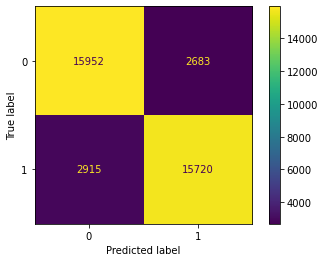

In [167]:
# Confusion Matrix for training
plot_confusion_matrix(trained_rf,X_train_pca,y_train)

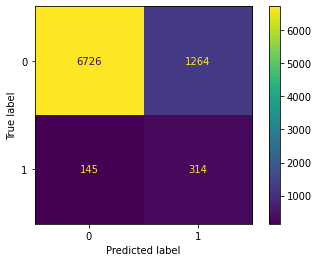

In [168]:
# Confusion Matrix for testing
plot_confusion_matrix(trained_rf,X_test_pca,y_test)

As we can see the results are good and model is not overfitted. However as the data is highly imbalace the accuracy is not a valid matrix for evaluation. <br>
According to the business case, if we predict a customer who is not churning as churn (FP), it will not creat any major business impact. However, failing to identify the churned customer(FN) will be concerning. Hence, recall and F1, F2 score will be more appropriate matrix that we would be interested in going furthre.

In [171]:
# F2 score at beta 2 for testing
from sklearn.metrics import fbeta_score
f2 = fbeta_score(y_test, pred_rf_test, average='macro', beta=2)
print("F2 score for RF with PCA is ", f2)

F2 score for RF with PCA is  0.6629658702951702


# Random Forest with PCA and hyper-parameter tuning

In [218]:
# Lets build a new model with hyper parameter tuning and PCA components
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2, 3, 4, 5],
    'n_estimators': [10, 30, 50, 75, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")

In [220]:
# Training the model
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 75, 100, 200]},
             scoring='accuracy', verbose=1)

In [221]:
# Getting the best estimators
print(grid_search.best_estimator_,"\n\n")
dt_best = grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42) 




In [222]:
#best_estimators are RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=200, n_jobs=-1, random_state=42)

# Making predictions
preds_train = dt_best.predict(X_train_pca)
preds_test = dt_best.predict(X_test_pca)

pred_prob_train = dt_best.predict_proba(X_train_pca)[:,1]
pred_prob_test = dt_best.predict_proba(X_test_pca)[:,1]

In [224]:
#Evaluating the model
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train_rf_all)
print("Accuracy in the test dataset:", accuracy_test_rf_all)

print("\n\nClassification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9808425006707808
Accuracy in the test dataset: 0.8989229494614748


Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     18635
           1       0.97      0.99      0.98     18635

    accuracy                           0.98     37270
   macro avg       0.98      0.98      0.98     37270
weighted avg       0.98      0.98      0.98     37270

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      7990
           1       0.28      0.53      0.36       459

    accuracy                           0.90      8449
   macro avg       0.62      0.73      0.65      8449
weighted avg       0.93      0.90      0.91      8449



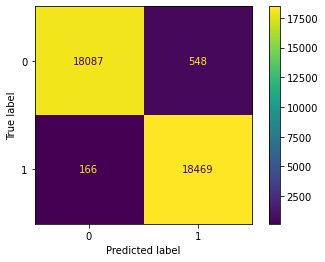

In [227]:
#Confusion matrix for training 
plot_confusion_matrix(dt_best,X_train_pca,y_train)

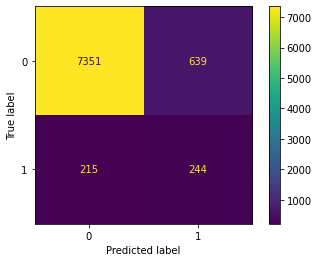

In [228]:
#Confusion matrix for testing 
plot_confusion_matrix(dt_best,X_test_pca,y_test)

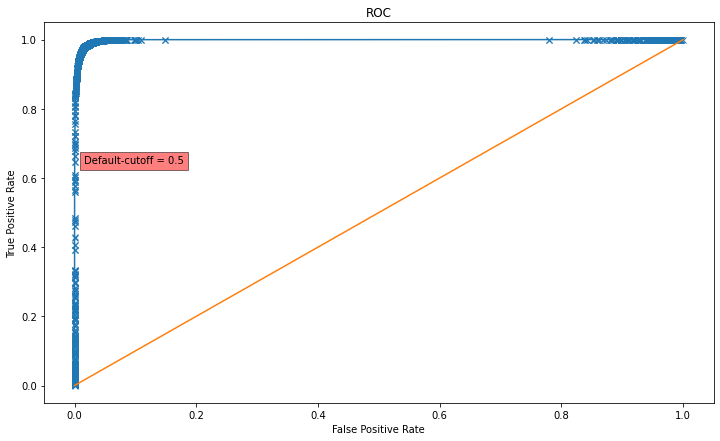

Area under Curve is 0.9983775938267002


In [229]:
# ROC in train dataset
from sklearn.metrics import roc_curve,roc_auc_score

rf_fpr, rf_tpr,_ = roc_curve(y_train,dt_best.predict_proba(X_train_pca)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest with PCA & HPT')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,dt_best.predict_proba(X_train_pca)[:,1]))

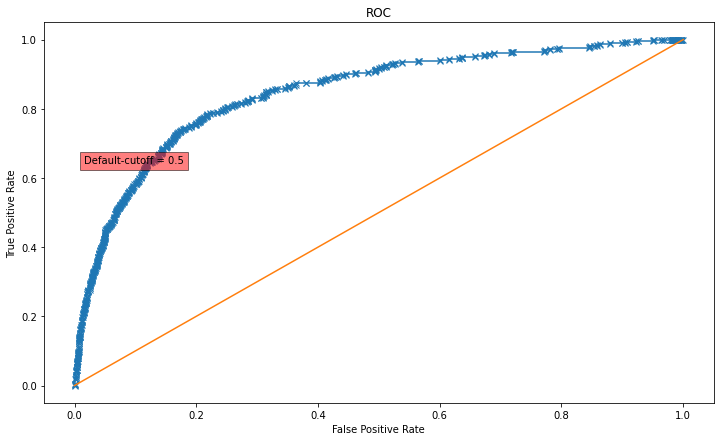

Area under Curve is 0.846095746044211


In [231]:
# ROC in test dataset
from sklearn.metrics import roc_curve,roc_auc_score

rf_fpr, rf_tpr,_ = roc_curve(y_test,dt_best.predict_proba(X_test_pca)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest with PCA & HPT')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,dt_best.predict_proba(X_test_pca)[:,1]))

In [232]:
# Let's try to validate the optimal cutoff for the model

optimal_cutoff = sorted(list(zip(np.abs(rf_tpr - rf_fpr), _)), key=lambda i: i[0], reverse=True)[0][1]
print("Optimal Probability Cutoff- ",optimal_cutoff)

Optimal Probability Cutoff-  0.25103869398575285


In [233]:
# Making new prediction as per the optimal cutoff
roc_opt_pred_train = [1 if i >= optimal_cutoff else 0 for i in dt_best.predict_proba(X_train_pca)[:, -1]]
roc_opt_pred_train[:5]

roc_opt_pred_test = [1 if i >= optimal_cutoff else 0 for i in dt_best.predict_proba(X_test_pca)[:, -1]]
roc_opt_pred_test[:5]

[0, 1, 0, 0, 0]

In [234]:
# Converting the array into pandas series for better manipulation
y_predict_opt_cutoff_train = pd.Series(roc_opt_pred_train, name='Predicted')
y_predict_opt_cutoff_test = pd.Series(roc_opt_pred_test, name='Predicted')

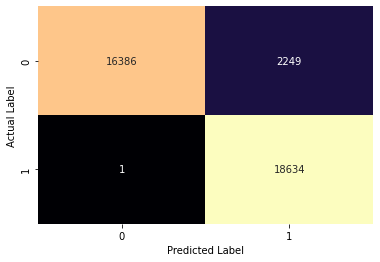

In [235]:
#Confusion Matrix at optima threshold training
sns.heatmap(confusion_matrix(y_train, y_predict_opt_cutoff_train),annot=True, fmt='d',cbar=False, cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

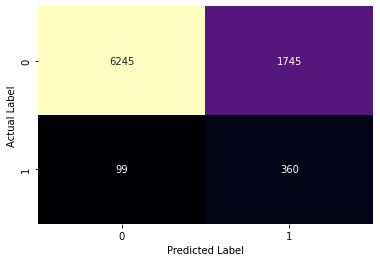

In [236]:
#Confusion Matrix at optima threshold testing
sns.heatmap(confusion_matrix(y_test, y_predict_opt_cutoff_test),annot=True, fmt='d',cbar=False, cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [237]:
#TPR AND FPT @0.25 threshold
print("TPR-",360/(360+99))
print("FPR-",1745/(1745+6245))
print("Accuracy- ",(6245+360)/(6245+360+99+1745))

TPR- 0.7843137254901961
FPR- 0.21839799749687108
Accuracy-  0.7817493194460883


In [239]:
# Getting few important features 
importances = dt_best.feature_importances_
cols = col

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})
# Top 10 features
sorted_feature_importance.head(10)

importance          col_name
0    0.205076            arpu_8
1    0.124795  loc_og_t2f_mou_7
2    0.108967      offnet_mou_8
3    0.059622      offnet_mou_7
4    0.052015       onnet_mou_7
5    0.046138      std_og_mou_8
6    0.040611       onnet_mou_8
7    0.039261            arpu_7
8    0.035865  loc_og_t2t_mou_7
9    0.034139  loc_og_t2m_mou_7

Results are good enogh however we will try another RF model with the manually selected features than PCA

# Random Forest with selected features and hyper-parameter tuning

In [172]:
# We will build a new RF model with the manually selected features and HPT

# The hyper parameter chosen here are received by an experiment performed on the same model; due to high computational requirement we have noted down just the parameter and used here 
rf_all = RandomForestClassifier(class_weight="balanced", max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [173]:
# training the RF model
trained_rf_all = rf_all.fit(X_train[col], y_train)

In [174]:
# Making predictions
preds_train = trained_rf_all.predict(X_train[col])
preds_test = trained_rf_all.predict(X_test[col])

pred_prob_train = trained_rf_all.predict_proba(X_train[col])[:,1]
pred_prob_test = trained_rf_all.predict_proba(X_test[col])[:,1]

In [176]:
# Evaluating the model
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train_rf_all)
print("Accuracy in the test dataset:", accuracy_test_rf_all)

print("\n\nClassification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("\nClassification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9847061980144889
Accuracy in the test dataset: 0.9331281808498048


Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     18635
           1       0.98      0.99      0.98     18635

    accuracy                           0.98     37270
   macro avg       0.98      0.98      0.98     37270
weighted avg       0.98      0.98      0.98     37270


Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7990
           1       0.42      0.56      0.48       459

    accuracy                           0.93      8449
   macro avg       0.69      0.76      0.72      8449
weighted avg       0.94      0.93      0.94      8449



In [179]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy Score on Testing: ",accuracy_score(y_test, preds_test))
confusion = confusion_matrix(y_test, preds_test)


TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

print("\nTP : ", TP)
print("FP : ", FP)
print("TN : ", TN)
print("FN : ", FN)

Accuracy Score on Testing:  0.9331281808498048

TP :  259
FP :  365
TN :  7625
FN :  200


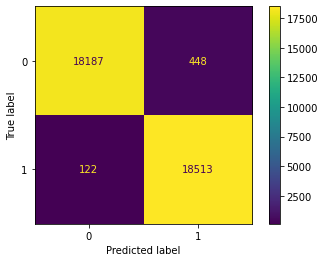

In [180]:
#Confusion matrix for training 
plot_confusion_matrix(trained_rf_all,X_train[col],y_train)

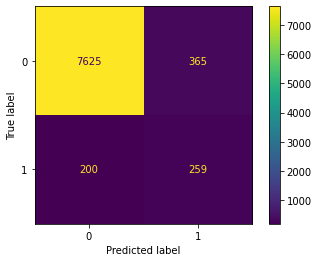

In [181]:
#Confusion matrix for testing
plot_confusion_matrix(trained_rf_all,X_test[col],y_test)

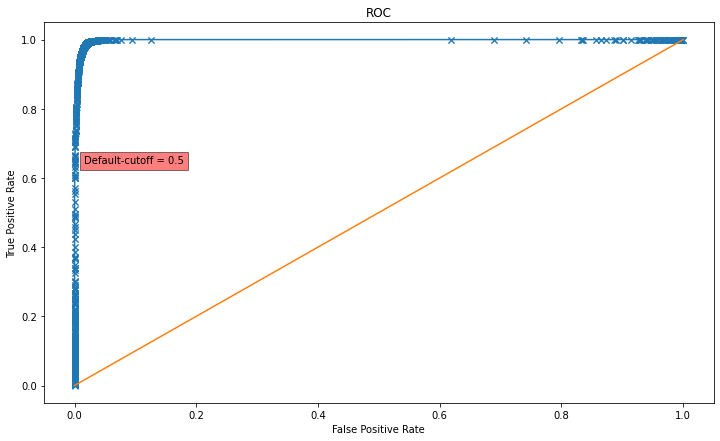

Area under Curve is 0.9980060629800348


In [183]:
# ROC in train dataset
from sklearn.metrics import roc_curve,roc_auc_score

rf_fpr, rf_tpr,_ = roc_curve(y_train,trained_rf_all.predict_proba(X_train[col])[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,trained_rf_all.predict_proba(X_train[col])[:,1]))

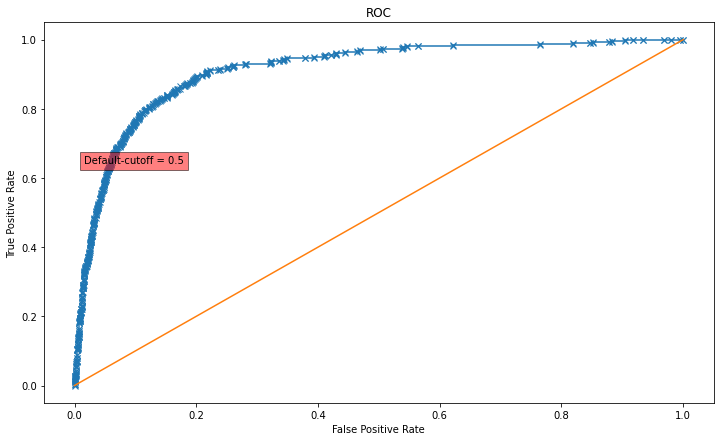

Area under Curve is 0.9121499914108323


In [184]:
# ROC in test dataset

rf_fpr, rf_tpr,_ = roc_curve(y_test,trained_rf_all.predict_proba(X_test[col])[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,trained_rf_all.predict_proba(X_test[col])[:,1]))

In [185]:
# Let's try to validate the optimal cutoff for the model

optimal_cutoff = sorted(list(zip(np.abs(rf_tpr - rf_fpr), _)), key=lambda i: i[0], reverse=True)[0][1]
print("Optimal Probability Cutoff- ",optimal_cutoff)

Optimal Probability Cutoff-  0.1827246773651185


In [186]:
# Making new prediction as per the optimal cutoff
roc_opt_pred_train = [1 if i >= optimal_cutoff else 0 for i in trained_rf_all.predict_proba(X_train[col])[:, -1]]
roc_opt_pred_train[:5]

roc_opt_pred_test = [1 if i >= optimal_cutoff else 0 for i in trained_rf_all.predict_proba(X_test[col])[:, -1]]
roc_opt_pred_test[:5]

[0, 1, 0, 0, 0]

In [187]:
# Converting the array into pandas series for better manipulation
y_predict_opt_cutoff_train = pd.Series(roc_opt_pred_train, name='Predicted')
y_predict_opt_cutoff_test = pd.Series(roc_opt_pred_test, name='Predicted')

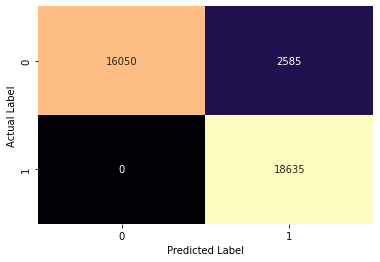

In [188]:
#Confusion Matrix at optima threshold training
sns.heatmap(confusion_matrix(y_train, y_predict_opt_cutoff_train),annot=True, fmt='d',cbar=False, cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

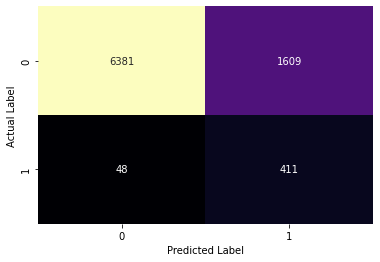

In [189]:
#Confusion Matrix at optima threshold testing
sns.heatmap(confusion_matrix(y_test, y_predict_opt_cutoff_test),annot=True, fmt='d',cbar=False, cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

**TPR & FPR at 18% threshold**

In [191]:
print("TPR-",411/(411+48))
print("FPR-",1609/(1609+6381))
print("Accuracy- ",(6381+411)/(6381+411+48+1609))

TPR- 0.8954248366013072
FPR- 0.2013767209011264
Accuracy-  0.8038821162267724


As discussed earlier out main focus should be reducing false positives. The RF model at optimal threshold seems to be performing really good in the task of predicting churn and not churn.

In [192]:
# F2 score at beta 2 for testing
from sklearn.metrics import fbeta_score
f2 = fbeta_score(y_test, y_predict_opt_cutoff_test, average='macro', beta=2)
print("F2 score for RF with PCA is ", f2)

F2 score for RF with PCA is  0.6820165672188037


The model has better F1 and F2 scores as well.

In [210]:
# Getting few important features 
importances = trained_rf_all.feature_importances_
cols = col

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})
# Top 20 features
sorted_feature_importance.head(20) 

importance               col_name
0     0.182742          roam_og_mou_8
1     0.131273    date_of_last_rech_8
2     0.065464         total_ic_mou_8
3     0.065439     last_day_rch_amt_8
4     0.053911       loc_ic_t2m_mou_8
5     0.042918       loc_ic_t2t_mou_8
6     0.041390                 arpu_8
7     0.022553       std_og_t2t_mou_7
8     0.022478       total_rech_num_8
9     0.019235           offnet_mou_8
10    0.019032           monthly_3g_8
11    0.019002                    aon
12    0.018527  total_data_rech_amt_7
13    0.017286           monthly_2g_8
14    0.016735           loc_ic_mou_7
15    0.015705                 arpu_7
16    0.014959            onnet_mou_7
17    0.014590            sachet_2g_8
18    0.014402           std_og_mou_8
19    0.014143           offnet_mou_7

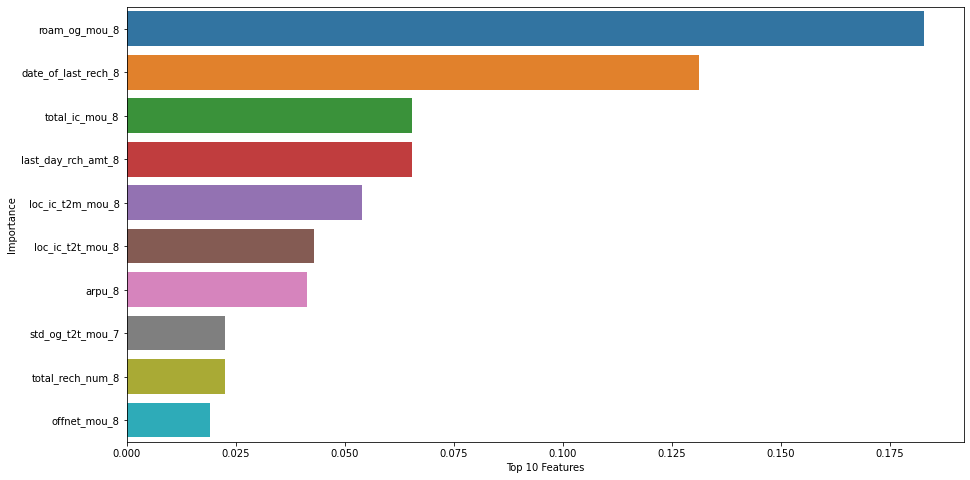

In [211]:
#Top 10 Features
plt.figure(figsize=(15, 8))

plot = sns.barplot(x='importance', y= 'col_name', data=sorted_feature_importance[0:10])
plot.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.show()

# XGBoosting

In [193]:
# Let's try building bossting model on the selected features and random hyperparameters
xgboost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001, n_jobs=-1, max_depth=6, colsample_bytree=1, gamma=0.1,
                            cv = None, scoring="f1_weighted", reg_alpha=0, reg_lambda=1, eval_metric="auc",
                           objective="binary:hinge", booster = "gbtree", tree_method = "exact", min_child_weight = 15)

xgb_model = xgboost.fit(X_train[col], y_train)

[19:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [194]:
preds_train = xgb_model.predict(X_train[col])
preds_test = xgb_model.predict(X_test[col])

accuracy_train = metrics.accuracy_score(y_train, preds_train)
accuracy_test = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train)
print("Accuracy in the test dataset:", accuracy_test)

print("Classification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.8840354172256507
Accuracy in the test dataset: 0.7902710379926619
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87     18635
           1       0.82      0.98      0.89     18635

    accuracy                           0.88     37270
   macro avg       0.90      0.88      0.88     37270
weighted avg       0.90      0.88      0.88     37270

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      7990
           1       0.18      0.83      0.30       459

    accuracy                           0.79      8449
   macro avg       0.59      0.81      0.59      8449
weighted avg       0.94      0.79      0.85      8449



In [195]:
# F2 Score on training
from sklearn.metrics import fbeta_score
fbeta_score(y_train, preds_train, average='macro', beta=2)

0.8816275317653803

In [196]:
# F2 Score on testing
from sklearn.metrics import fbeta_score
fbeta_score(y_test, preds_test, average='macro', beta=2)

0.653202570916807

F2 score and other matrices are not better than the previous model (RF). WE will try hyper parameter tuning now.

# XGBoosting with hyper parameter tuning

In [197]:
# Building new xgboost model with hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

# defining XGBoost Model
xgb_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [198]:
# params = {
#         'n_estimators' : [100, 200, 500, 750], # no of trees 
#         'learning_rate' : [0.01, 0.02, 0.18],  # eta
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 2.5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10]
#         }


# After performing HPT the following are the best params; to reduce the computational time in rerun the parameter are provided directly here
params = {
        'n_estimators' : [750], # no of trees 
        'learning_rate' : [0.18],  # eta
        'min_child_weight': [1],
        'gamma': [0.1],
        'subsample': [0.8],
        'colsample_bytree': [0.6],
        'max_depth': [10]
        }
folds = 3

param_comb = 800

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [199]:
# training the model
xg_hpt = random_search.fit(X_train[col], y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[19:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [200]:
# Getting best things of the model

print('\n Best estimator:')
print(xg_hpt.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(xg_hpt.best_score_ )
print('\n Best hyperparameters:')
print(xg_hpt.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.18, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best accuracy for 3-fold search with 800 parameter combinations:
0.9706466326804402

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.18, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [201]:
preds_test = random_search.predict(X_test[col])
print('Accuracy Score: ', accuracy_score(y_test, preds_test))

print("\n\nClassification report on test dataset:", "\n", classification_report(y_test, preds_test))

print("\n\n F1 Score: ", f1_score(y_test, preds_test))

print("\n\n F2 Score:", fbeta_score(y_test, preds_test, average='macro', beta=2))

Accuracy Score:  0.9433069002248787


Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7990
           1       0.47      0.41      0.44       459

    accuracy                           0.94      8449
   macro avg       0.72      0.69      0.70      8449
weighted avg       0.94      0.94      0.94      8449



 F1 Score:  0.439766081871345


 F2 Score: 0.6967904561841773


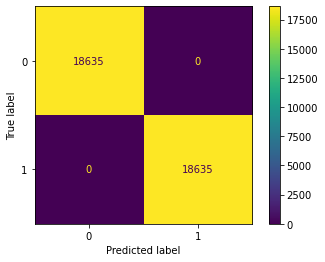

In [203]:
#Confusion matrix for training 
plot_confusion_matrix(xg_hpt,X_train[col],y_train)

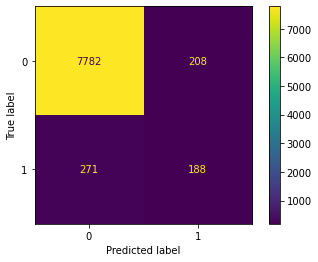

In [205]:
#Confusion matrix for testing 
plot_confusion_matrix(xg_hpt,X_test[col],y_test)

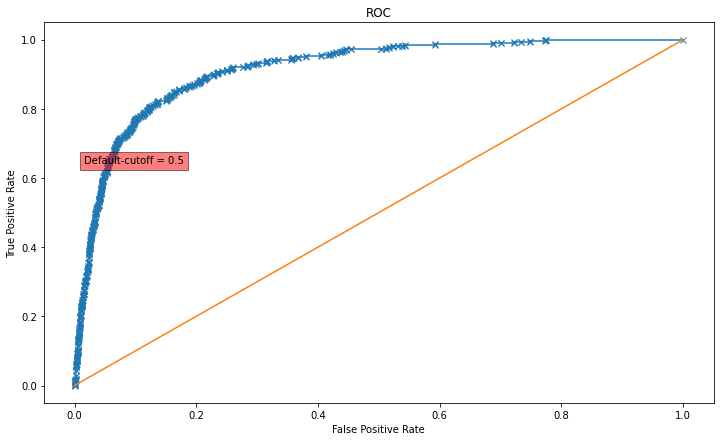

Area under Curve is 0.9142972833689171


In [206]:
# ROC for testing
rf_fpr, rf_tpr,_ = roc_curve(y_test,xg_hpt.predict_proba(X_test[col])[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XGBoost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,xg_hpt.predict_proba(X_test[col])[:,1]))

In [207]:
importances = xg_hpt.best_estimator_.feature_importances_
cols = col

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})
# Top 20 features
sorted_feature_importance.head(20) 

importance               col_name
0     0.191039          roam_og_mou_8
1     0.120812           monthly_2g_8
2     0.096861           monthly_3g_8
3     0.080318    date_of_last_rech_8
4     0.065649           monthly_2g_6
5     0.050948     last_day_rch_amt_8
6     0.042064         total_ic_mou_8
7     0.032364           spl_ic_mou_8
8     0.030868           monthly_2g_7
9     0.029175            sachet_3g_8
10    0.021856           monthly_3g_6
11    0.020541            sachet_2g_8
12    0.015723       loc_ic_t2m_mou_8
13    0.015637       std_og_t2t_mou_7
14    0.014693           monthly_3g_7
15    0.010688  total_data_rech_amt_7
16    0.009845           std_og_mou_8
17    0.009741       loc_ic_t2t_mou_8
18    0.008943            sachet_2g_7
19    0.008733            vol_3g_mb_6

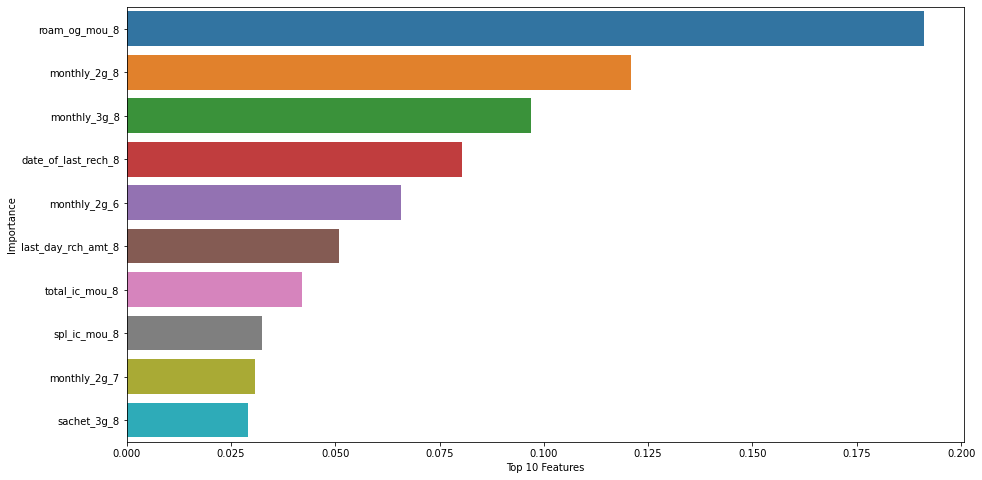

In [208]:
#Top 10 Features
plt.figure(figsize=(15, 8))

plot = sns.barplot(x='importance', y= 'col_name', data=sorted_feature_importance[0:10])
plot.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.show()

In [212]:
#Let's try to build SVM also

from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train[col], y_train)
pred_SMOTE = clf_SMOTE.predict(X_test[col])

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ROC AUC score for oversampled SMOTE data:  0.7889815973670793


In [213]:
preds_test = clf_SMOTE.predict(X_test[col])
print('Accuracy Score: ', accuracy_score(y_test, preds_test))

print("\n\nClassification report on test dataset:", "\n", classification_report(y_test, preds_test))

print("\n\n F1 Score: ", f1_score(y_test, preds_test))

print("\n\n F2 Score:", fbeta_score(y_test, preds_test, average='macro', beta=2))

Accuracy Score:  0.8824712983785064


Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.94      7990
           1       0.27      0.68      0.39       459

    accuracy                           0.88      8449
   macro avg       0.63      0.79      0.66      8449
weighted avg       0.94      0.88      0.91      8449



 F1 Score:  0.38741517581739665


 F2 Score: 0.7167804585090173


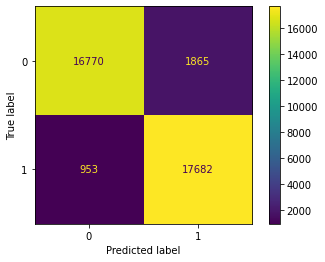

In [215]:
#Confusion matrix for training 
plot_confusion_matrix(clf_SMOTE,X_train[col],y_train)

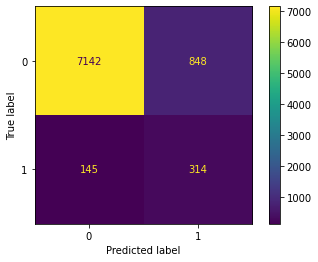

In [216]:
#Confusion matrix for testing 
plot_confusion_matrix(clf_SMOTE,X_test[col],y_test)

## Conclusion:

- We have performed different learning algorithms: Logistic Regression, Random Forest Classifier (with PCA and with all the features) and also XGBoost.
- From our model buidling we can conclude that the **Random Forest Classifier** with all the features is the **Best Candidate**
- SVM seems to be the second best model for prediction
- XGBoost also performs pretty well but the results are not as good as random forest classifer with all features.

**Important Features**
1. Features related to the 8th month are important to predict churn and not churn
2. Monthly 2G and 3G usage is one of the prime indicator for churning
3. Incoming and Outgoing calls for the 8th month are also useful for the prediction
4. Max Recharge Amount is a strong feature to predict churn.